# 이전 DNN 코드

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Input

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

In [ ]:

model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


W0821 00:48:13.984249 140281580390272 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.7731 - acc: 0.7749
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3412 - acc: 0.9015
Epoch 3/5
60000/60000 [===========================

# CNN

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

import time

In [3]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

# Conv2D는 width*height*channel을 입력으로 받음
train_x = train_x.reshape((60000, 28, 28, 1)) # ADDED
test_x = test_x.reshape((10000, 28, 28, 1)) # ADDED

train_y = raw_train_y
test_y = raw_test_y

11493376/11490434 [==============================] - 0s 0us/step


# callback 적용 - 로스 그래프


In [4]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import Callback

from IPython.display import clear_output

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])



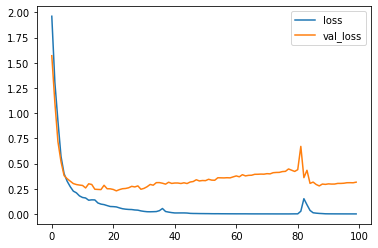

loss =  0.0010148744331672788 , val_loss =  0.3158473074436188
313/313 [==============================] - 1s 2ms/step - loss: 0.2545 - accuracy: 0.9535
loss= 0.2545155882835388
acc= 0.953499972820282
[7 2 1 ... 4 5 6]


In [10]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=10)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=100, verbose=1, batch_size=128, validation_split=0.2, 
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


# Drop Out 적용 - 오버피팅

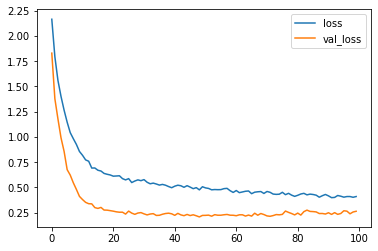

loss =  0.409165620803833 , val_loss =  0.26325616240501404
313/313 [==============================] - 1s 2ms/step - loss: 0.2578 - accuracy: 0.9510
loss= 0.257842481136322
acc= 0.9509999752044678
[7 2 1 ... 4 5 6]


In [9]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # ADDED
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=10)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=100, verbose=1, batch_size=128, validation_split=0.2, 
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


# Batch Normalization 적용 - 오버피팅


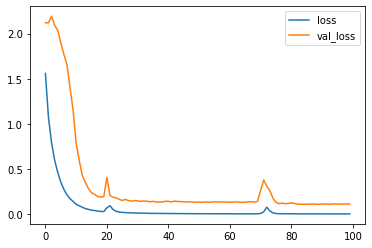

loss =  0.0006801696144975722 , val_loss =  0.1116195023059845
313/313 [==============================] - 1s 2ms/step - loss: 0.1061 - accuracy: 0.9695
loss= 0.10608910769224167
acc= 0.9695000052452087
[7 2 1 ... 4 5 6]


In [8]:
from tensorflow.keras.layers import Dropout, BatchNormalization

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization()) # ADDED
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization()) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=10)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=100, verbose=1, batch_size=128, validation_split=0.2, 
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


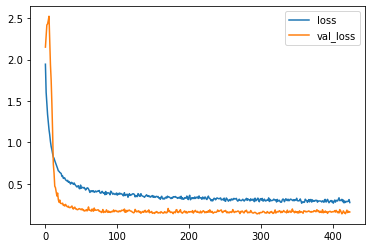

loss =  0.2763209939002991 , val_loss =  0.16268430650234222
Epoch 426/1000
22/38 [================>.............] - ETA: 0s - loss: 0.3137 - accuracy: 0.9009

KeyboardInterrupt: ignored

In [19]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # ADDED
model.add(BatchNormalization()) # ADDED
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) # ADDED
model.add(BatchNormalization()) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=10)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=1000, verbose=1, batch_size=128, validation_split=0.2, 
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


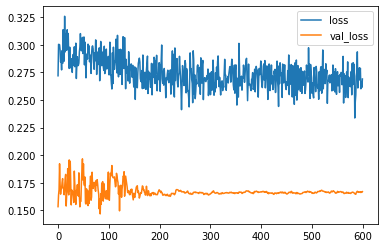

loss =  0.26900166273117065 , val_loss =  0.16691045463085175
313/313 [==============================] - 1s 2ms/step - loss: 0.1535 - accuracy: 0.9645
loss= 0.15346409380435944
acc= 0.9645000100135803


In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # 모니터링 대상
                              factor=0.2,         # 줄이는 양
                              patience=50,         # 대상 기간동안 유지
                              min_lr=0.00001)       # 최소 학습율


model.fit(train_x[:6000], train_y[:6000], epochs=600, verbose=1, batch_size=128, validation_split=0.2, 
          callbacks=[plot_losses, reduce_lr])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

# 잘못 분류된 결과 보기

In [21]:
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

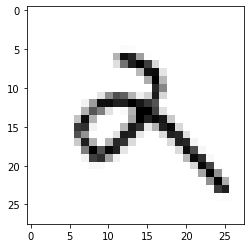

y = 2, predicted=9


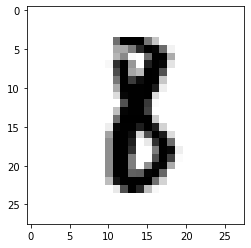

y = 8, predicted=1


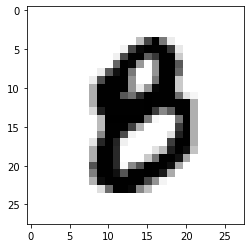

y = 8, predicted=1


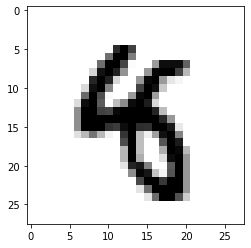

y = 8, predicted=4


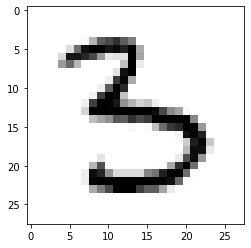

y = 3, predicted=5


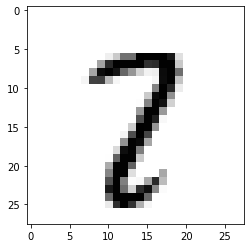

y = 2, predicted=7


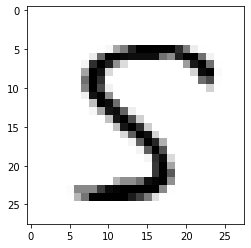

y = 5, predicted=8


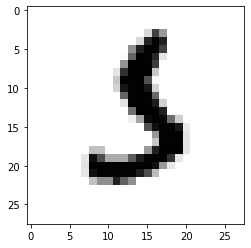

y = 5, predicted=6


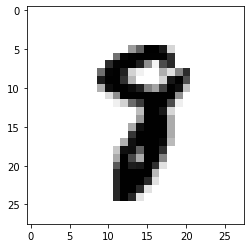

y = 8, predicted=9


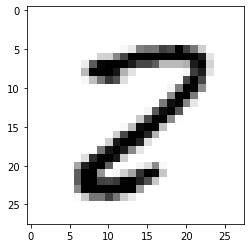

y = 2, predicted=8


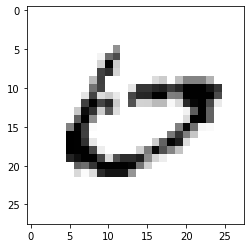

y = 6, predicted=0


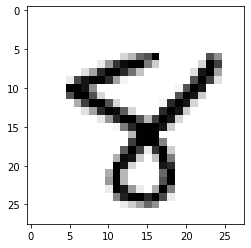

y = 8, predicted=3


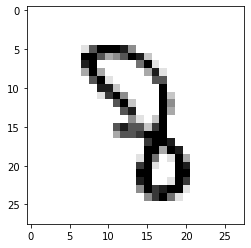

y = 8, predicted=7


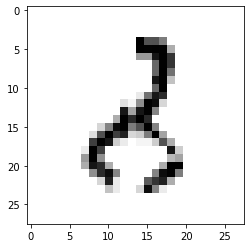

y = 8, predicted=1


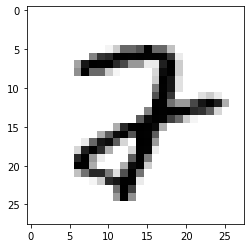

y = 2, predicted=8


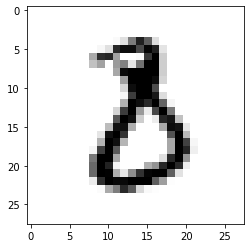

y = 8, predicted=1


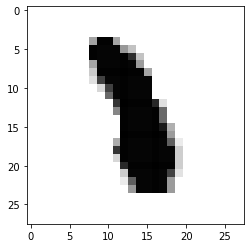

y = 1, predicted=8


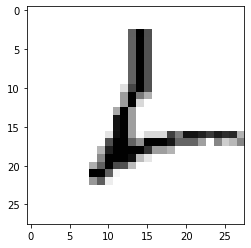

y = 2, predicted=6


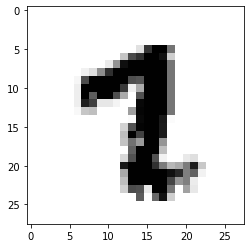

y = 2, predicted=7


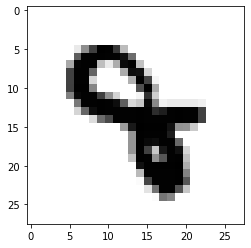

y = 8, predicted=7


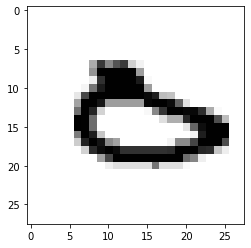

y = 0, predicted=5


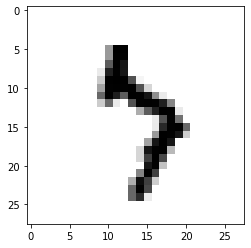

y = 7, predicted=3


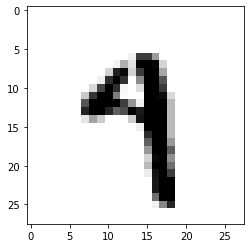

y = 4, predicted=9


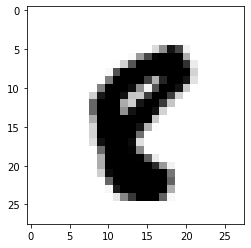

y = 8, predicted=2


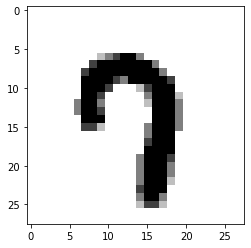

y = 7, predicted=9


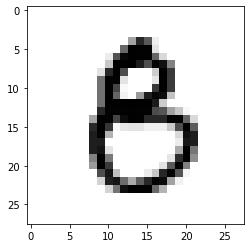

y = 8, predicted=3


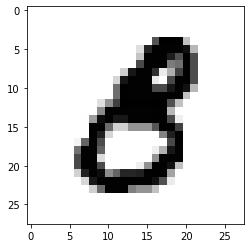

y = 8, predicted=1


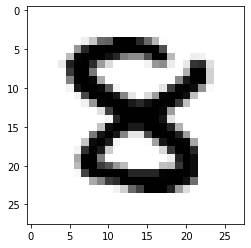

y = 8, predicted=3


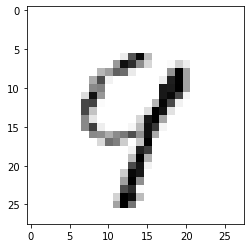

y = 9, predicted=7


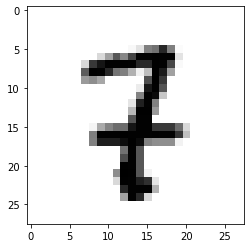

y = 7, predicted=3


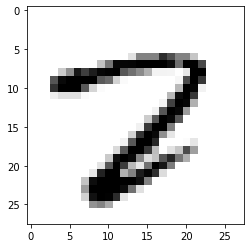

y = 2, predicted=7


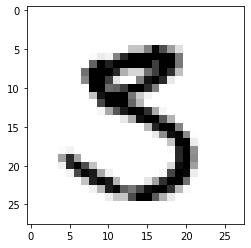

y = 3, predicted=5


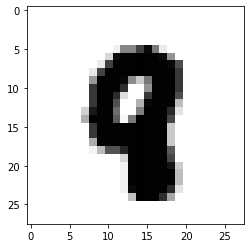

y = 8, predicted=9


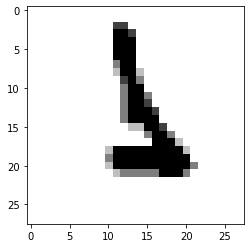

y = 1, predicted=6


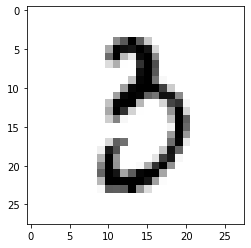

y = 3, predicted=1


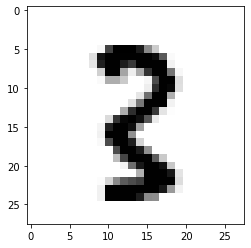

y = 3, predicted=1


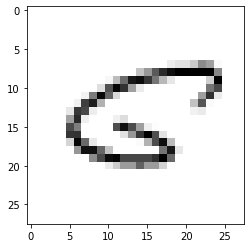

y = 6, predicted=5


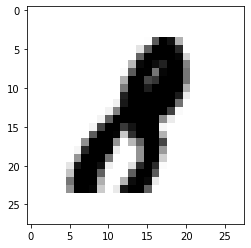

y = 8, predicted=1


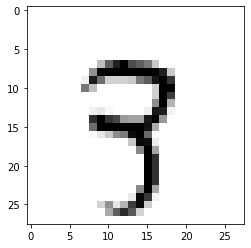

y = 3, predicted=7


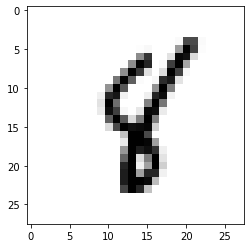

y = 8, predicted=4


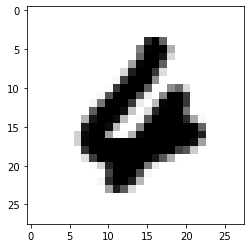

y = 4, predicted=6


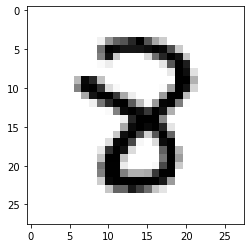

y = 8, predicted=3


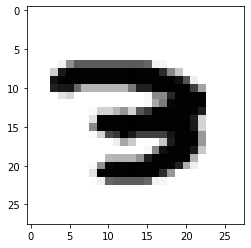

y = 3, predicted=7


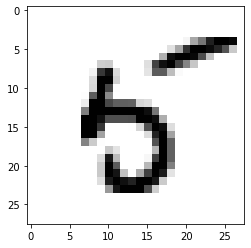

y = 5, predicted=6


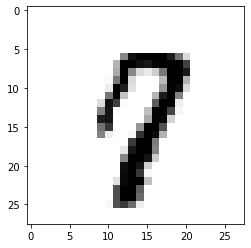

y = 7, predicted=9


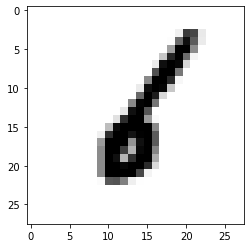

y = 6, predicted=1


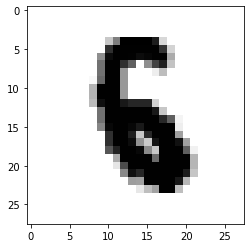

y = 6, predicted=5


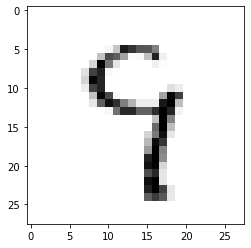

y = 9, predicted=7


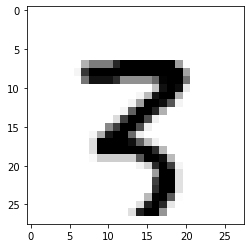

y = 3, predicted=7


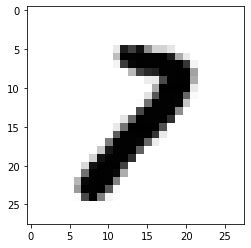

y = 7, predicted=2


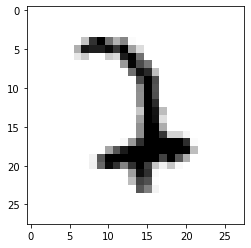

y = 7, predicted=2


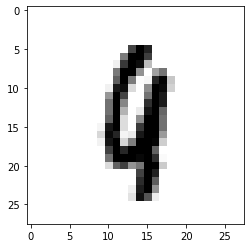

y = 9, predicted=1


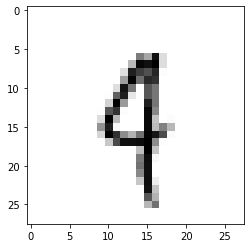

y = 4, predicted=9


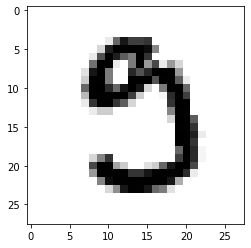

y = 9, predicted=3


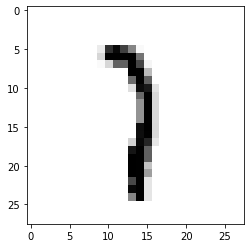

y = 7, predicted=1


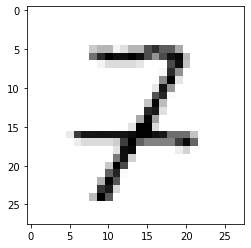

y = 7, predicted=2


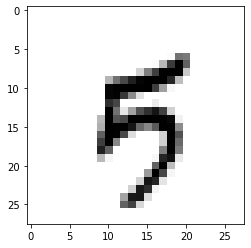

y = 5, predicted=3


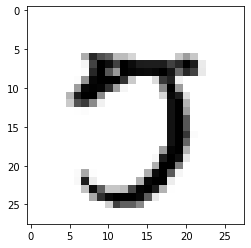

y = 5, predicted=3


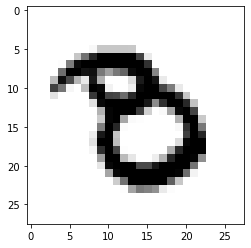

y = 8, predicted=3


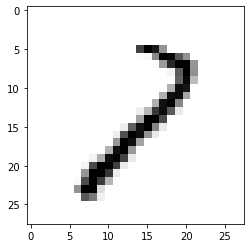

y = 7, predicted=2


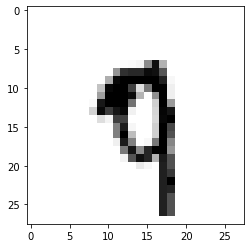

y = 9, predicted=3


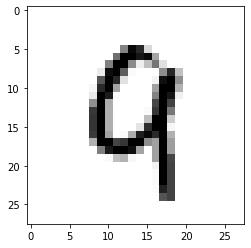

y = 9, predicted=4


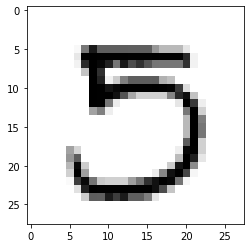

y = 5, predicted=3


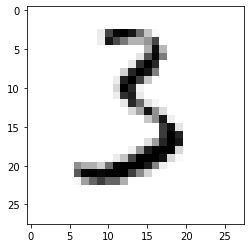

y = 3, predicted=5


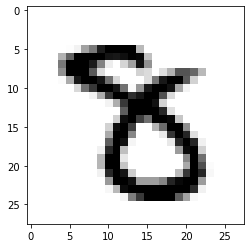

y = 8, predicted=3


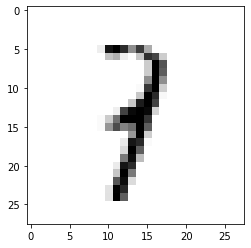

y = 7, predicted=1


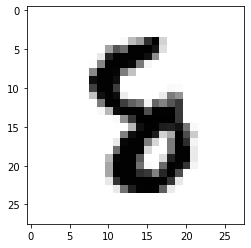

y = 8, predicted=5


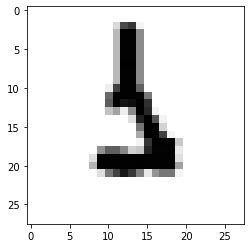

y = 1, predicted=6


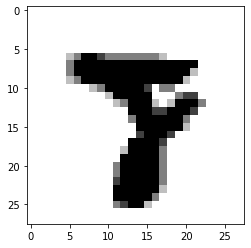

y = 8, predicted=7


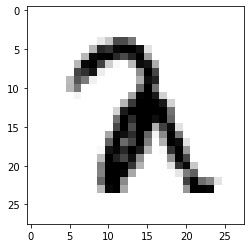

y = 2, predicted=1


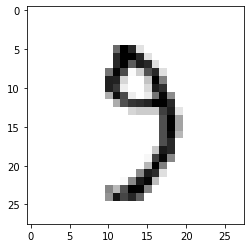

y = 9, predicted=3


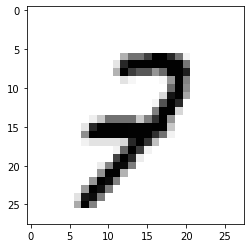

y = 7, predicted=9


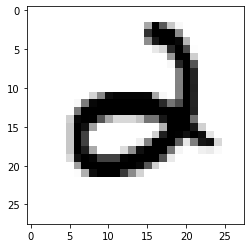

y = 2, predicted=0


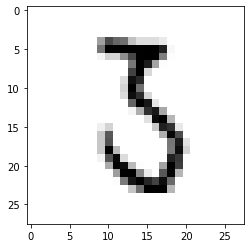

y = 3, predicted=5


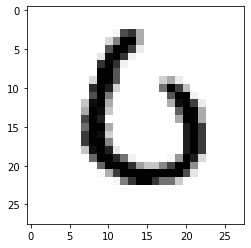

y = 0, predicted=6


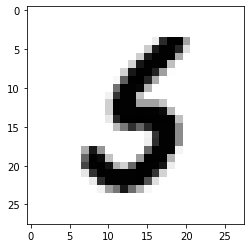

y = 5, predicted=6


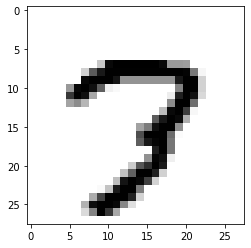

y = 3, predicted=7


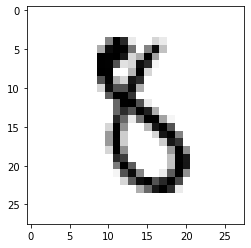

y = 8, predicted=6


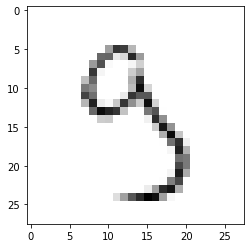

y = 9, predicted=5


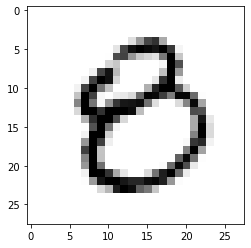

y = 8, predicted=0


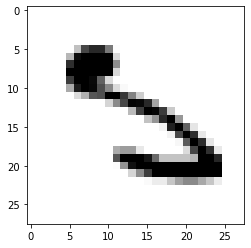

y = 5, predicted=6


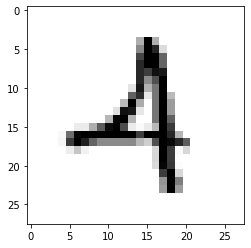

y = 4, predicted=2


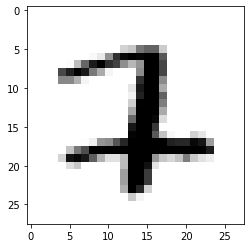

y = 7, predicted=2


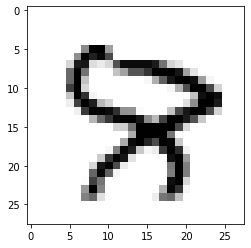

y = 8, predicted=7


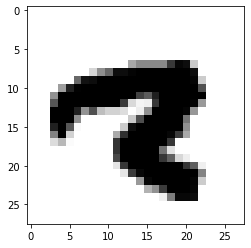

y = 2, predicted=7


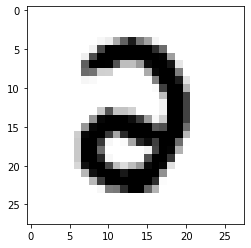

y = 2, predicted=0


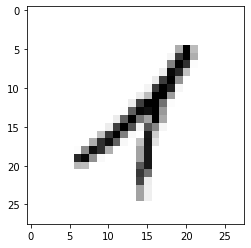

y = 1, predicted=7


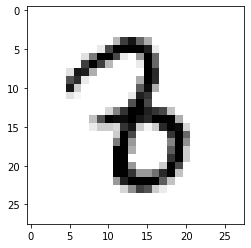

y = 8, predicted=3


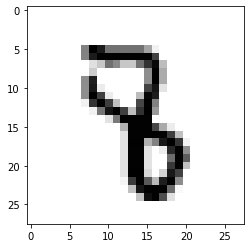

y = 8, predicted=3


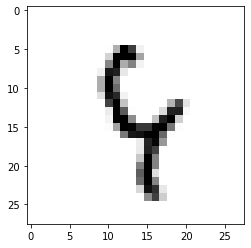

y = 9, predicted=4


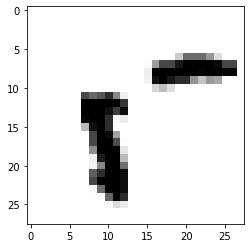

y = 5, predicted=6


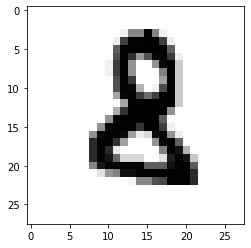

y = 8, predicted=2


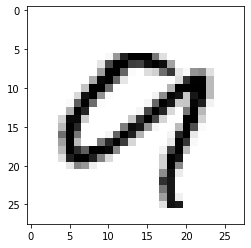

y = 9, predicted=2


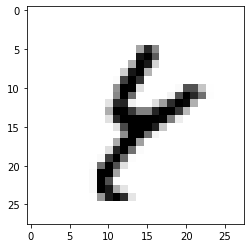

y = 4, predicted=1


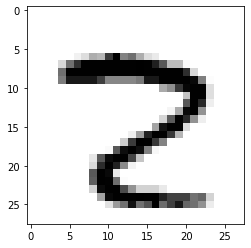

y = 2, predicted=7


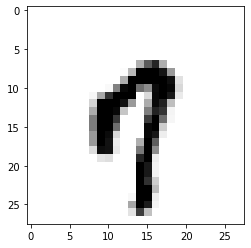

y = 7, predicted=9


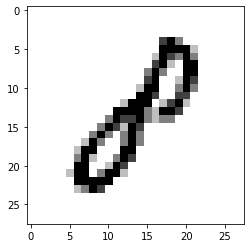

y = 8, predicted=1


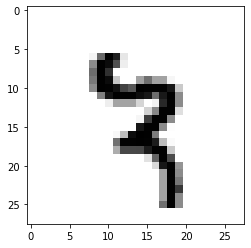

y = 3, predicted=7


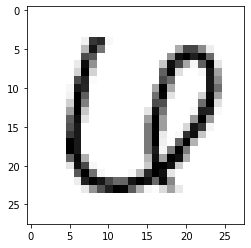

y = 6, predicted=0


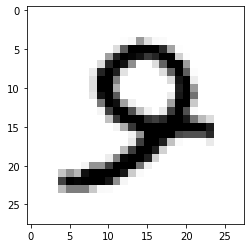

y = 9, predicted=8


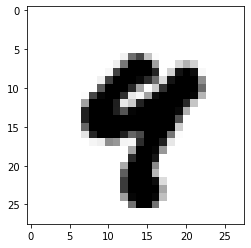

y = 4, predicted=9


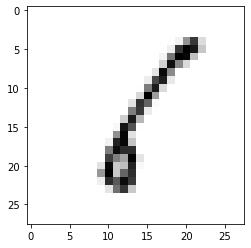

y = 6, predicted=1


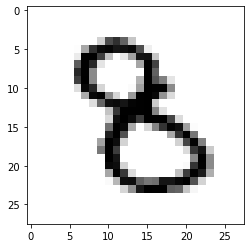

y = 8, predicted=3


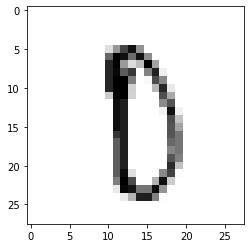

y = 0, predicted=8


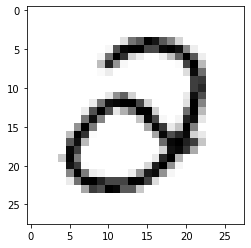

y = 2, predicted=0


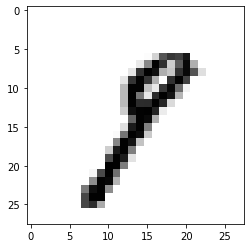

y = 9, predicted=7


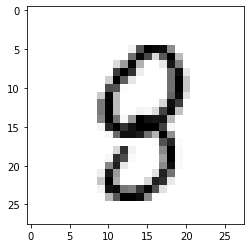

y = 8, predicted=3


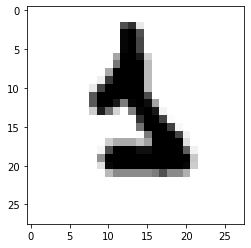

y = 1, predicted=3


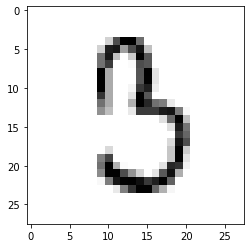

y = 3, predicted=5


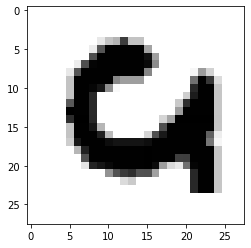

y = 9, predicted=0


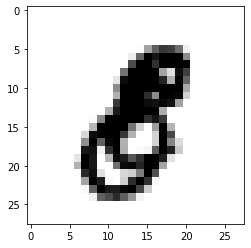

y = 8, predicted=1


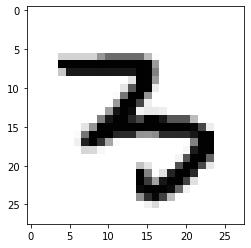

y = 3, predicted=8


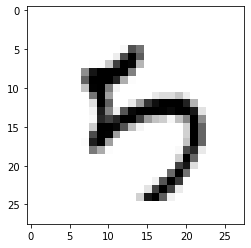

y = 5, predicted=6


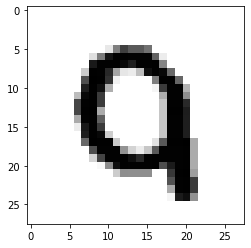

y = 9, predicted=0


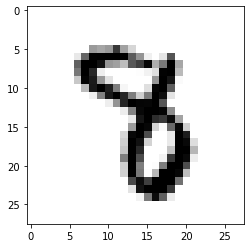

y = 8, predicted=3


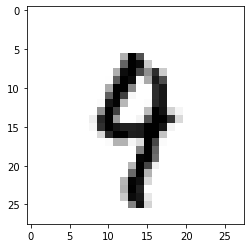

y = 4, predicted=9


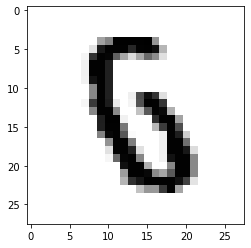

y = 6, predicted=5


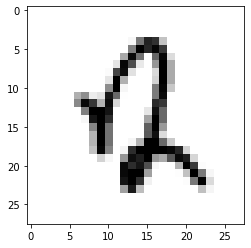

y = 2, predicted=7


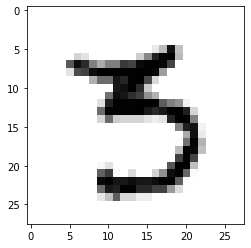

y = 3, predicted=5


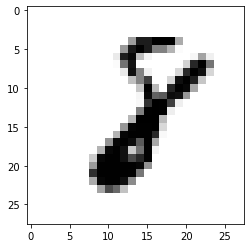

y = 8, predicted=2


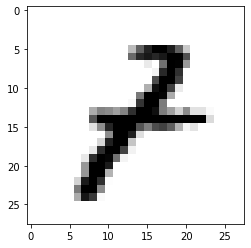

y = 7, predicted=1


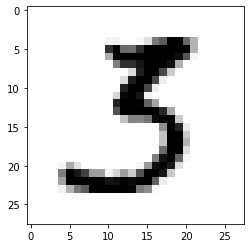

y = 3, predicted=5


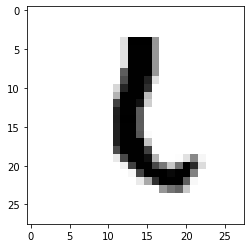

y = 6, predicted=1


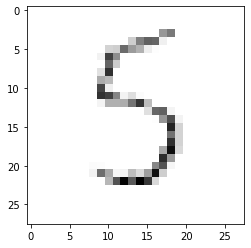

y = 5, predicted=6


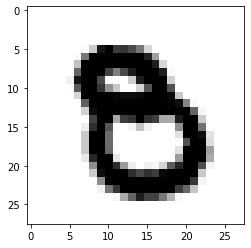

y = 8, predicted=3


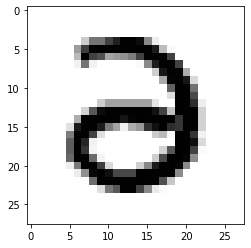

y = 2, predicted=1


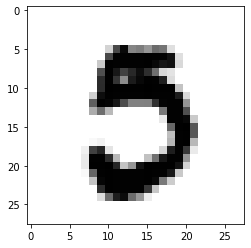

y = 5, predicted=3


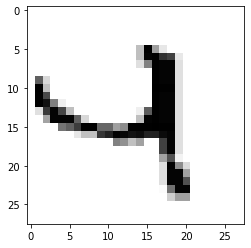

y = 4, predicted=7


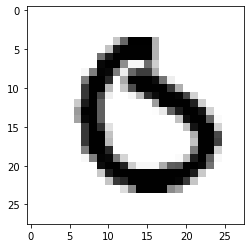

y = 0, predicted=6


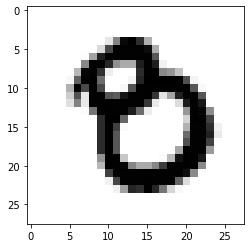

y = 8, predicted=0


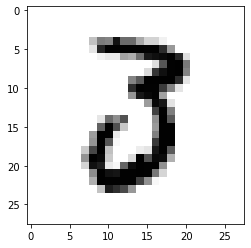

y = 3, predicted=2


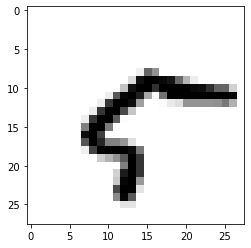

y = 5, predicted=3


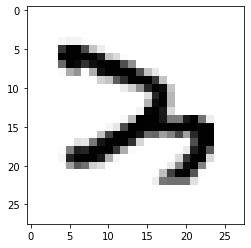

y = 3, predicted=7


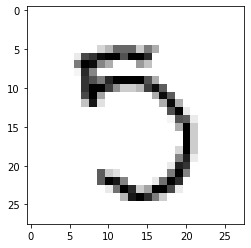

y = 5, predicted=3


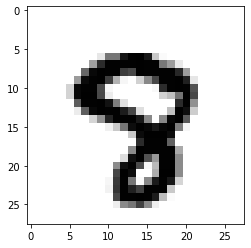

y = 8, predicted=9


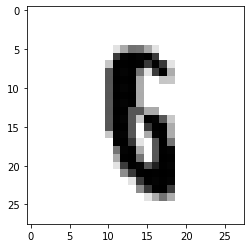

y = 6, predicted=5


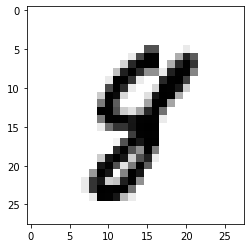

y = 8, predicted=4


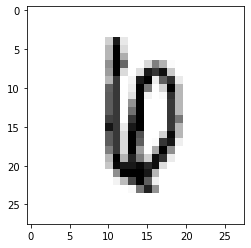

y = 6, predicted=0


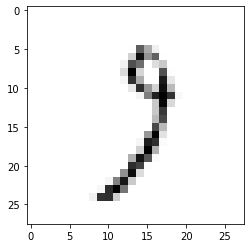

y = 9, predicted=7


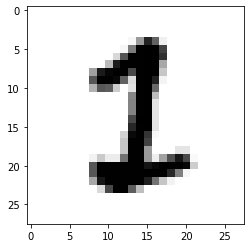

y = 1, predicted=2


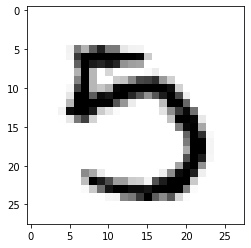

y = 5, predicted=3


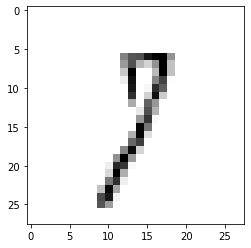

y = 7, predicted=9


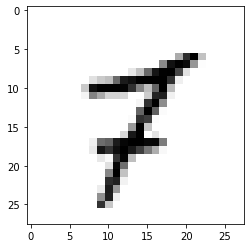

y = 7, predicted=9


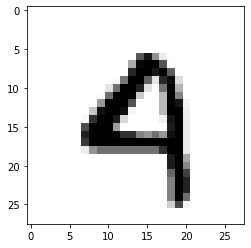

y = 4, predicted=9


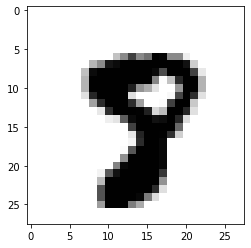

y = 8, predicted=9


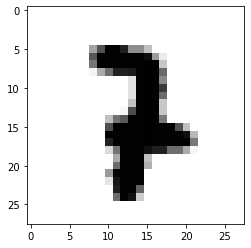

y = 7, predicted=2


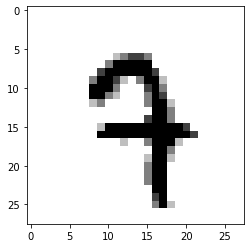

y = 7, predicted=9


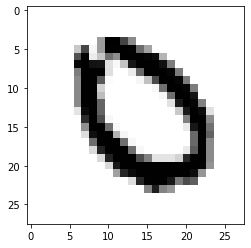

y = 0, predicted=1


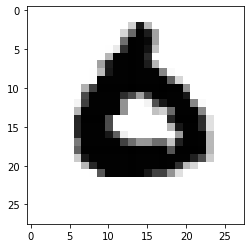

y = 6, predicted=0


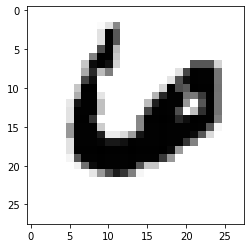

y = 6, predicted=4


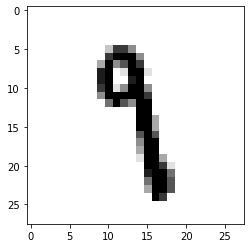

y = 9, predicted=3


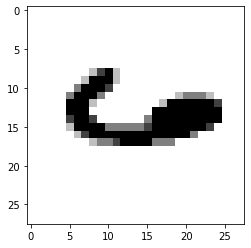

y = 6, predicted=4


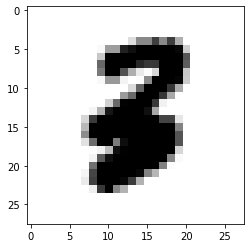

y = 3, predicted=8


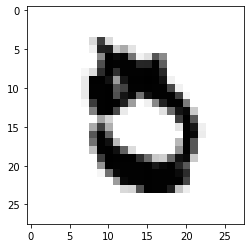

y = 5, predicted=0


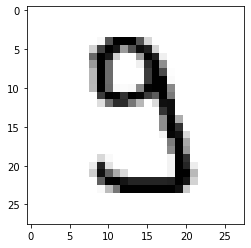

y = 9, predicted=3


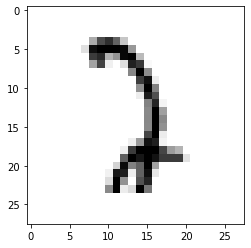

y = 2, predicted=7


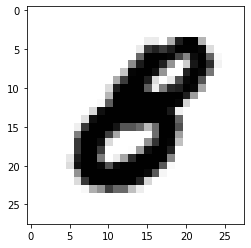

y = 8, predicted=0


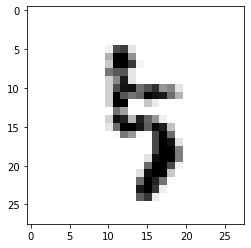

y = 5, predicted=3


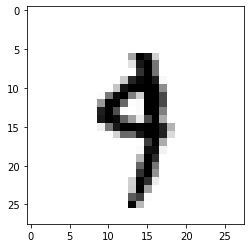

y = 4, predicted=9


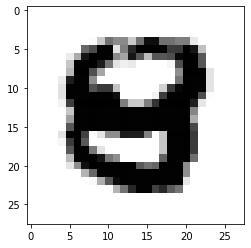

y = 8, predicted=9


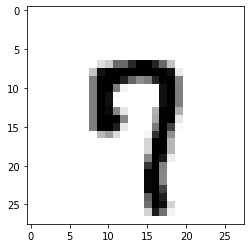

y = 7, predicted=9


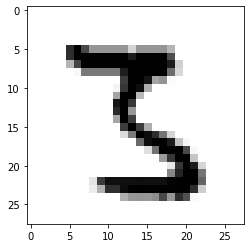

y = 3, predicted=5


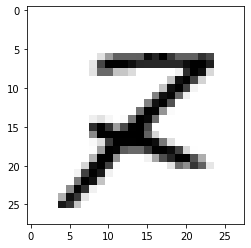

y = 7, predicted=2


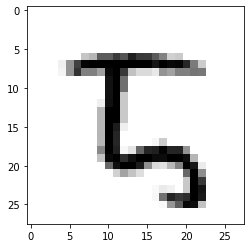

y = 5, predicted=2


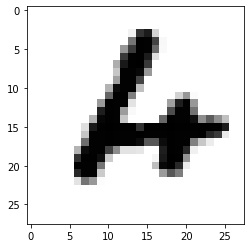

y = 4, predicted=6


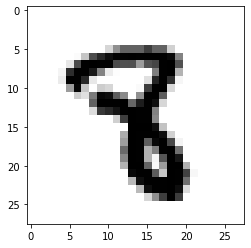

y = 8, predicted=3


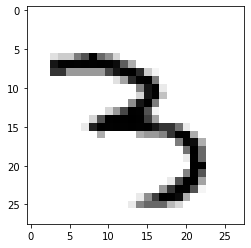

y = 3, predicted=7


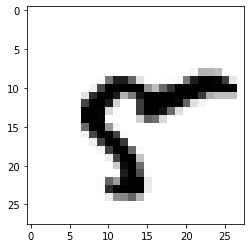

y = 5, predicted=3


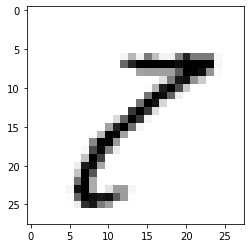

y = 7, predicted=8


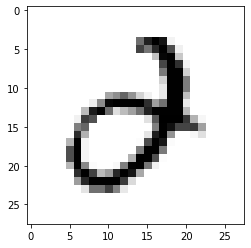

y = 2, predicted=0


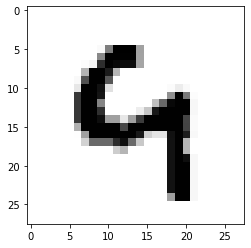

y = 9, predicted=4


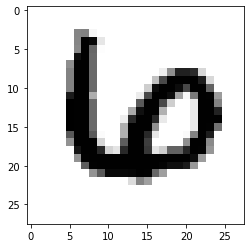

y = 6, predicted=0


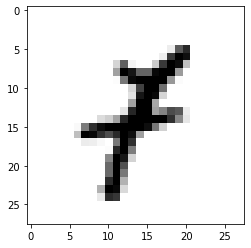

y = 7, predicted=1


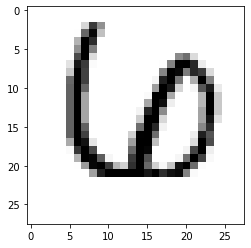

y = 6, predicted=0


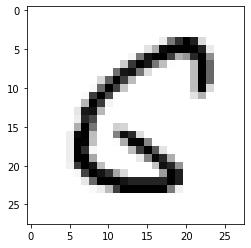

y = 6, predicted=0


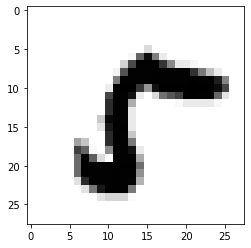

y = 5, predicted=0


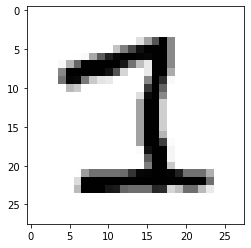

y = 1, predicted=3


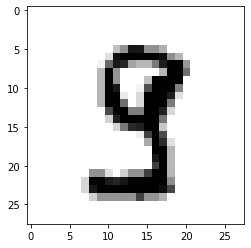

y = 9, predicted=3


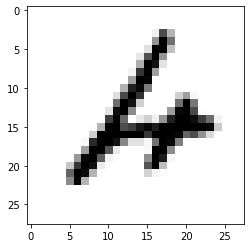

y = 4, predicted=6


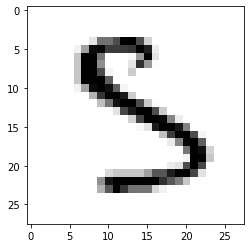

y = 5, predicted=3


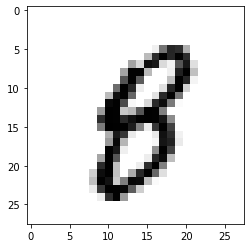

y = 8, predicted=3


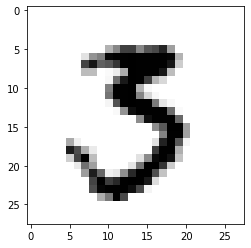

y = 3, predicted=5


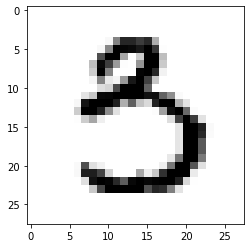

y = 3, predicted=5


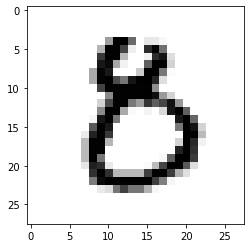

y = 8, predicted=6


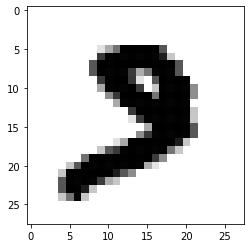

y = 9, predicted=5


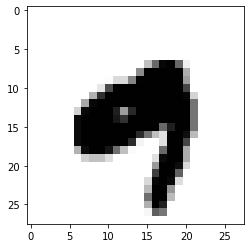

y = 9, predicted=4


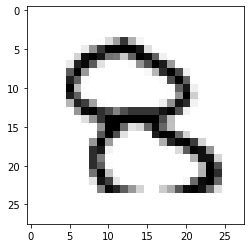

y = 8, predicted=2


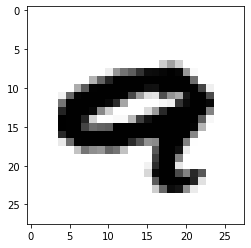

y = 9, predicted=7


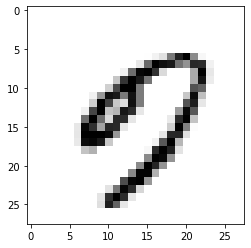

y = 9, predicted=0


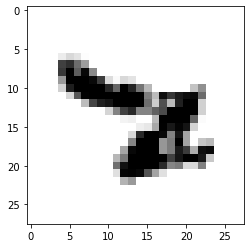

y = 2, predicted=7


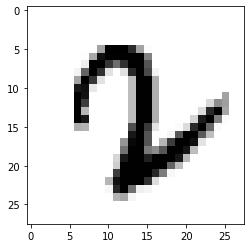

y = 2, predicted=1


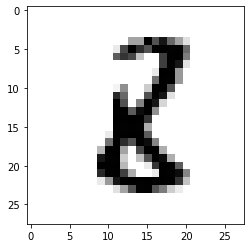

y = 8, predicted=1


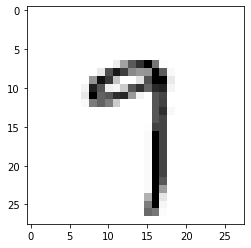

y = 9, predicted=7


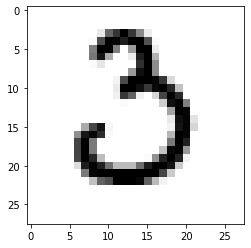

y = 3, predicted=1


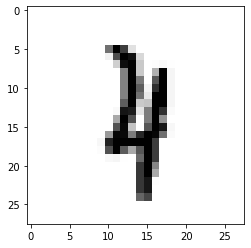

y = 4, predicted=7


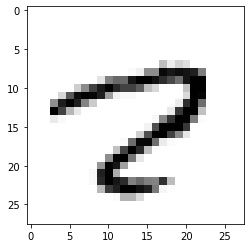

y = 2, predicted=7


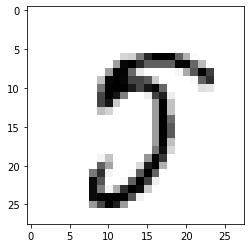

y = 5, predicted=9


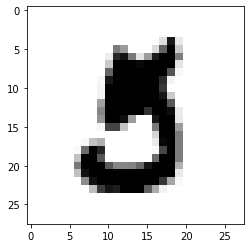

y = 5, predicted=3


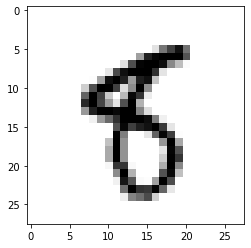

y = 8, predicted=5


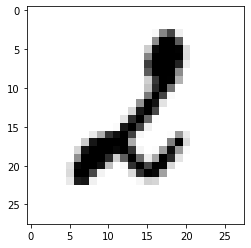

y = 2, predicted=1


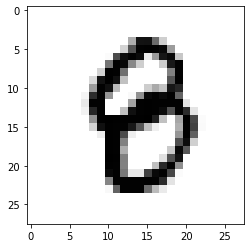

y = 8, predicted=0


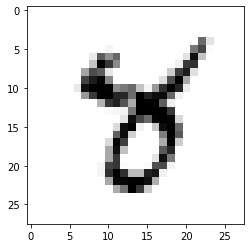

y = 8, predicted=3


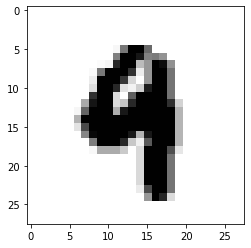

y = 9, predicted=4


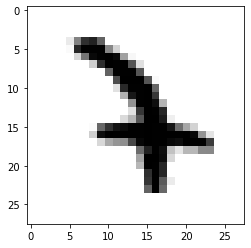

y = 7, predicted=2


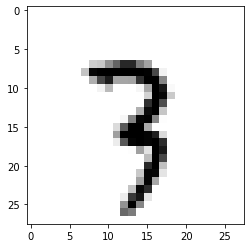

y = 3, predicted=7


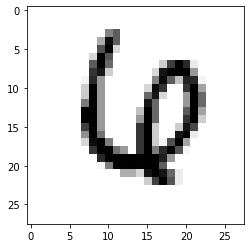

y = 6, predicted=4


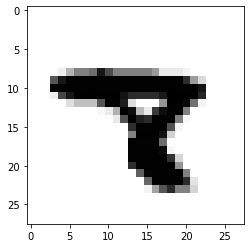

y = 8, predicted=7


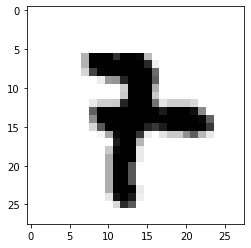

y = 7, predicted=3


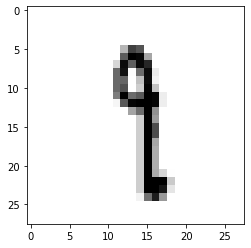

y = 9, predicted=3


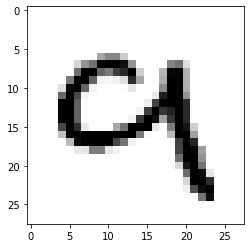

y = 9, predicted=4


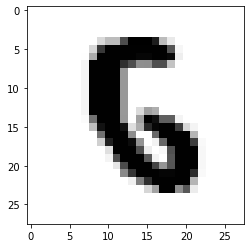

y = 6, predicted=5


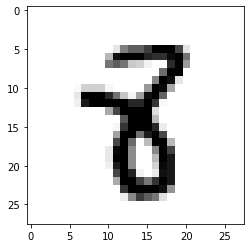

y = 8, predicted=3


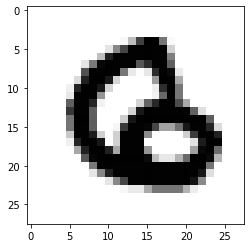

y = 6, predicted=0


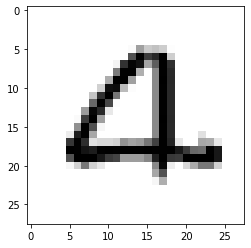

y = 4, predicted=9


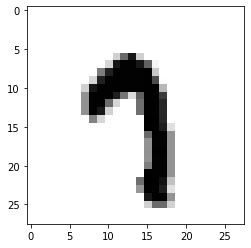

y = 7, predicted=9


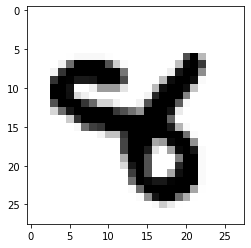

y = 8, predicted=7


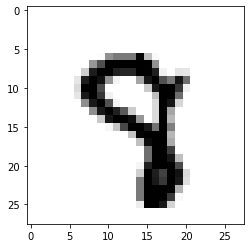

y = 8, predicted=9


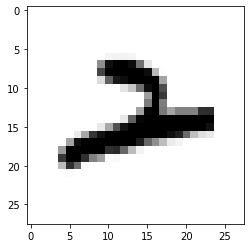

y = 2, predicted=7


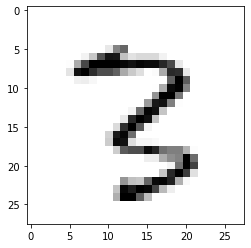

y = 3, predicted=9


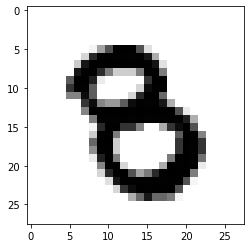

y = 8, predicted=3


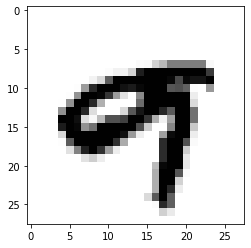

y = 9, predicted=7


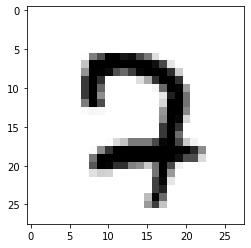

y = 7, predicted=2


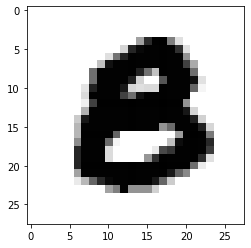

y = 8, predicted=0


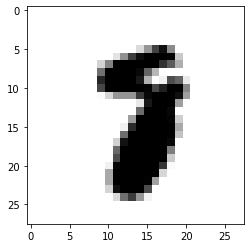

y = 8, predicted=7


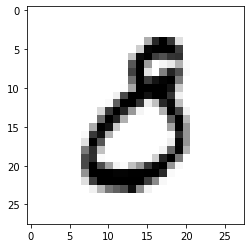

y = 8, predicted=0


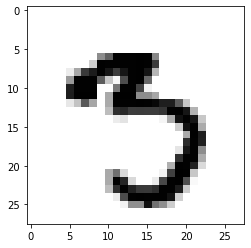

y = 3, predicted=5


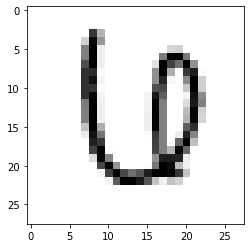

y = 6, predicted=4


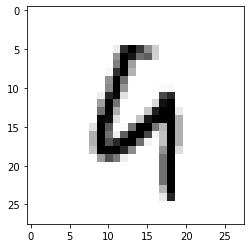

y = 9, predicted=4


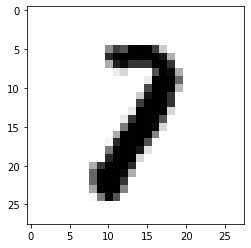

y = 7, predicted=2


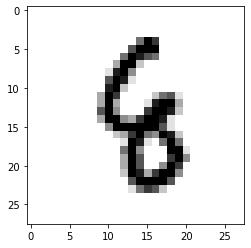

y = 8, predicted=6


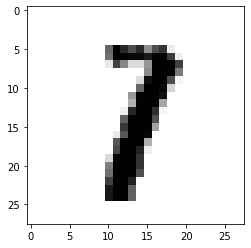

y = 7, predicted=1


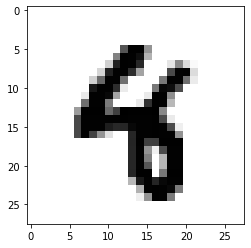

y = 8, predicted=4


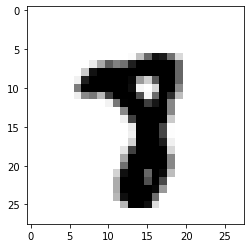

y = 8, predicted=7


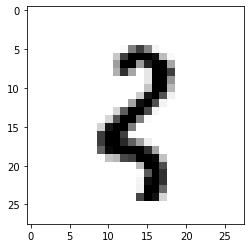

y = 3, predicted=1


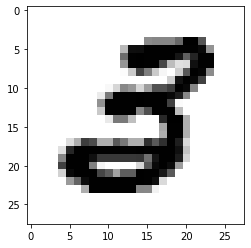

y = 3, predicted=5


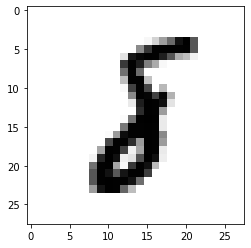

y = 8, predicted=5


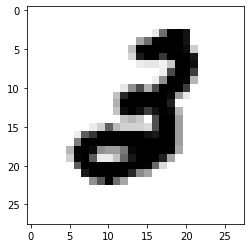

y = 3, predicted=8


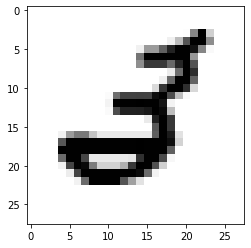

y = 3, predicted=5


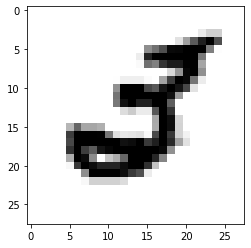

y = 3, predicted=5


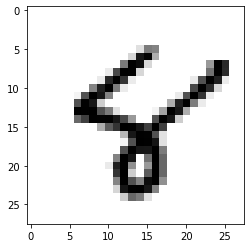

y = 8, predicted=4


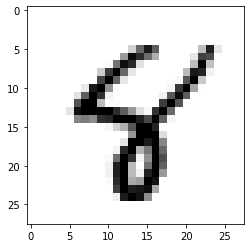

y = 8, predicted=4


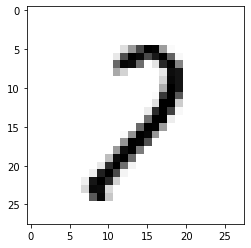

y = 7, predicted=2


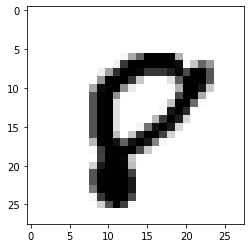

y = 8, predicted=7


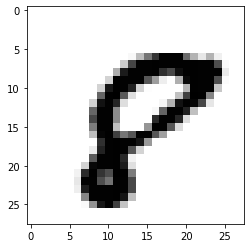

y = 8, predicted=3


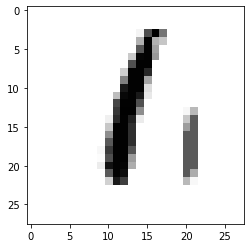

y = 1, predicted=6


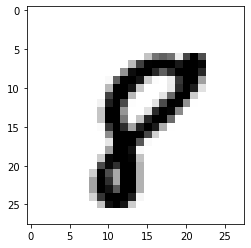

y = 8, predicted=9


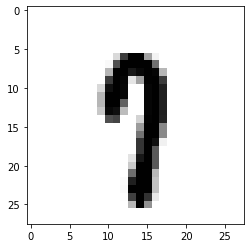

y = 7, predicted=9


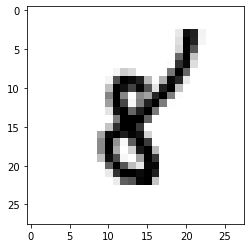

y = 8, predicted=3


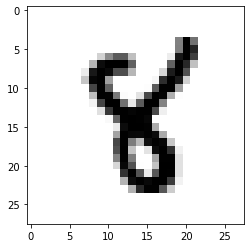

y = 8, predicted=3


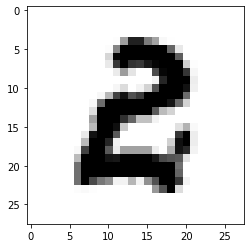

y = 2, predicted=0


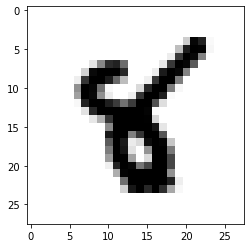

y = 8, predicted=3


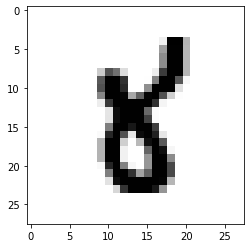

y = 8, predicted=3


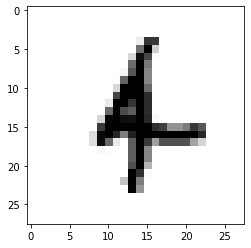

y = 4, predicted=1


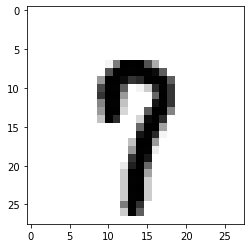

y = 7, predicted=9


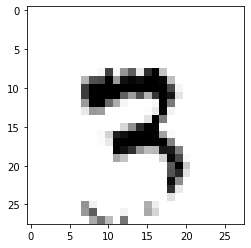

y = 3, predicted=7


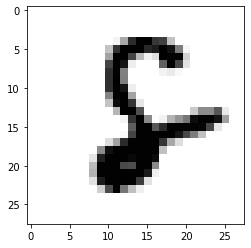

y = 8, predicted=2


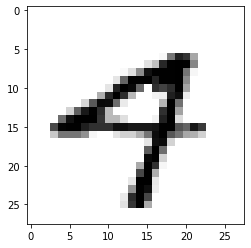

y = 4, predicted=7


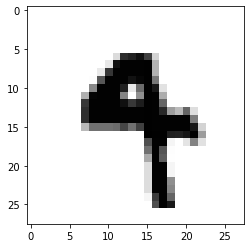

y = 4, predicted=9


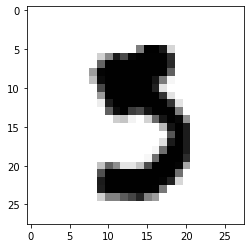

y = 5, predicted=3


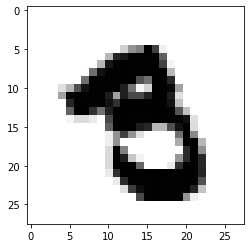

y = 3, predicted=8


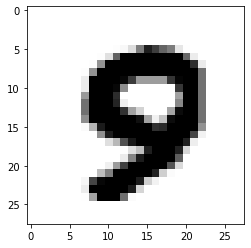

y = 9, predicted=3


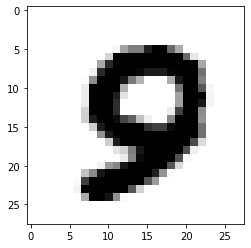

y = 9, predicted=3


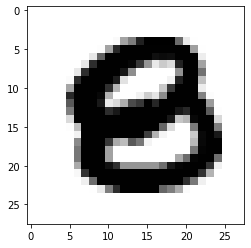

y = 8, predicted=0


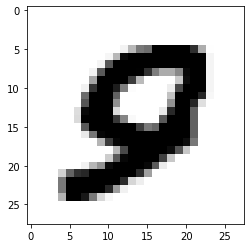

y = 9, predicted=5


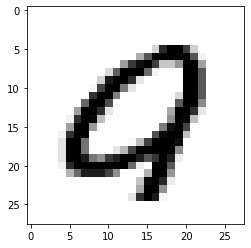

y = 9, predicted=0


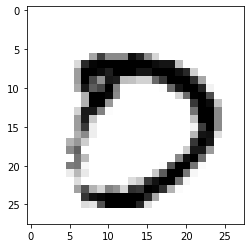

y = 0, predicted=1


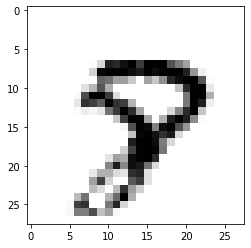

y = 8, predicted=7


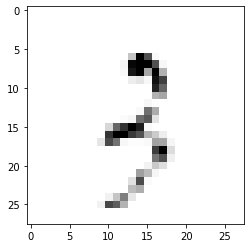

y = 3, predicted=2


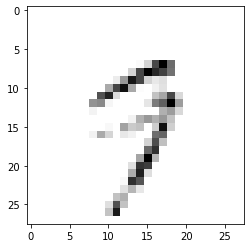

y = 9, predicted=7


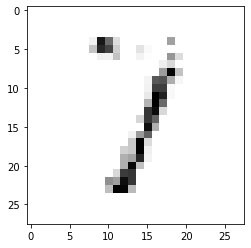

y = 7, predicted=1


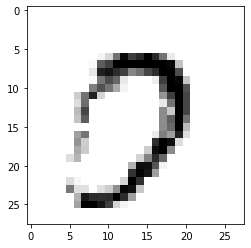

y = 0, predicted=7


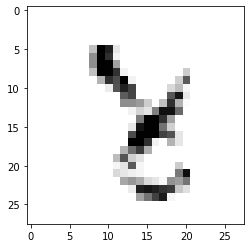

y = 8, predicted=2


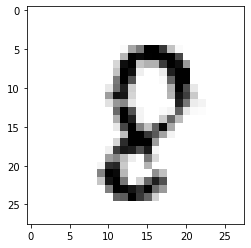

y = 8, predicted=2


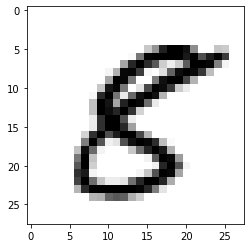

y = 8, predicted=5


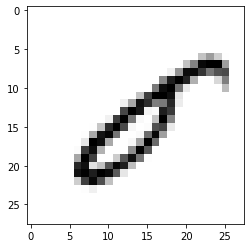

y = 0, predicted=2


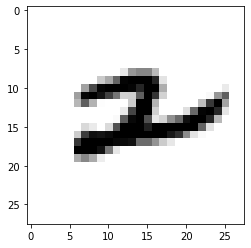

y = 2, predicted=7


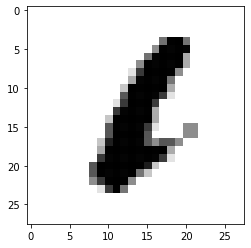

y = 1, predicted=6


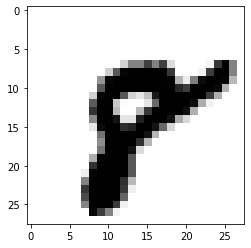

y = 8, predicted=9


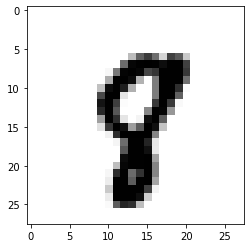

y = 8, predicted=9


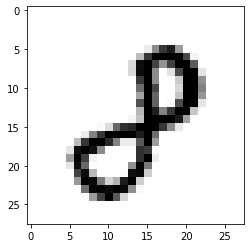

y = 8, predicted=2


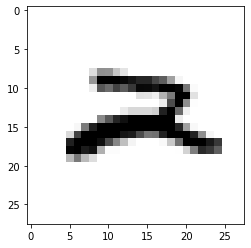

y = 2, predicted=7


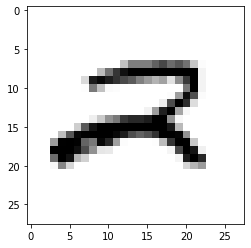

y = 2, predicted=7


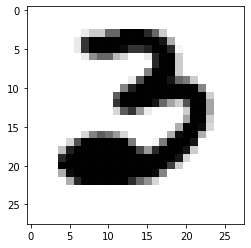

y = 3, predicted=7


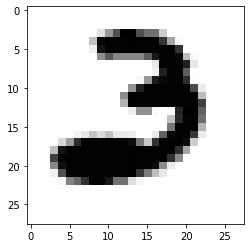

y = 3, predicted=2


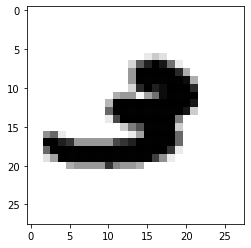

y = 3, predicted=9


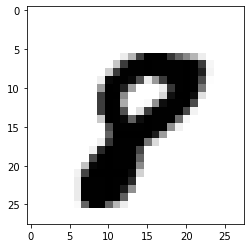

y = 8, predicted=9


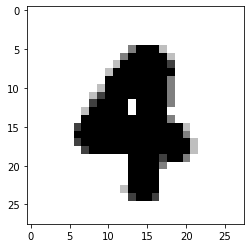

y = 4, predicted=7


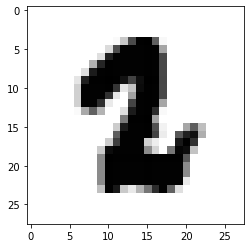

y = 2, predicted=1


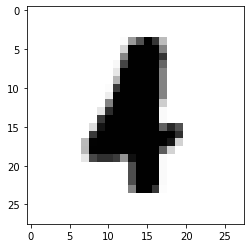

y = 4, predicted=1


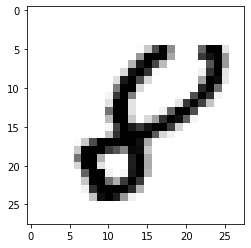

y = 8, predicted=6


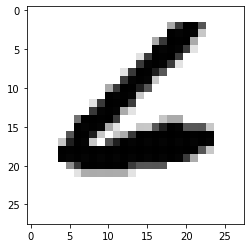

y = 6, predicted=2


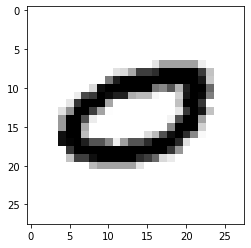

y = 0, predicted=9


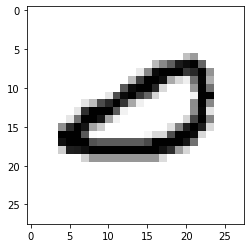

y = 0, predicted=9


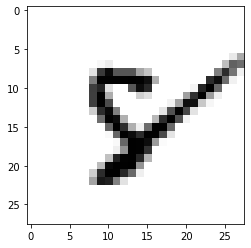

y = 8, predicted=7


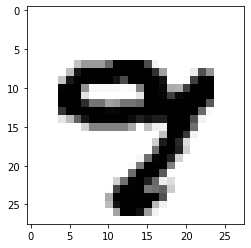

y = 9, predicted=7


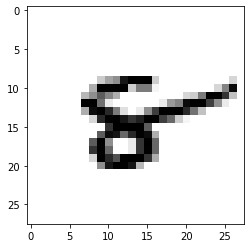

y = 8, predicted=5


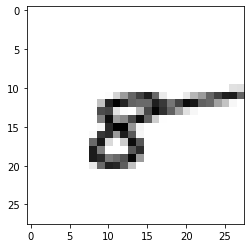

y = 8, predicted=5


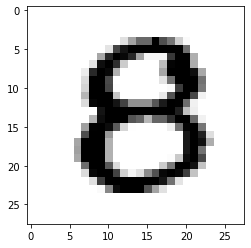

y = 8, predicted=0


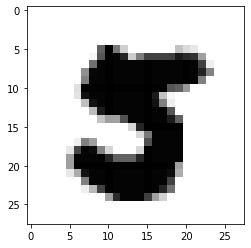

y = 5, predicted=3


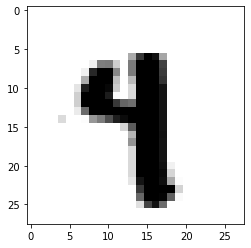

y = 4, predicted=9


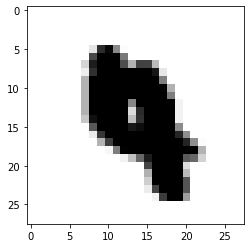

y = 4, predicted=9


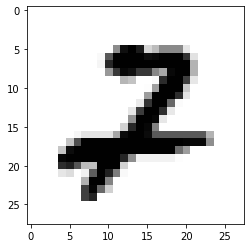

y = 7, predicted=2


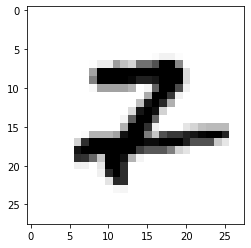

y = 7, predicted=2


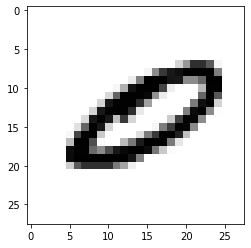

y = 0, predicted=2


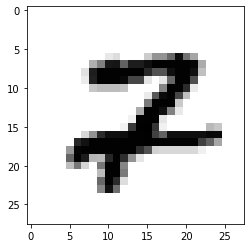

y = 7, predicted=2


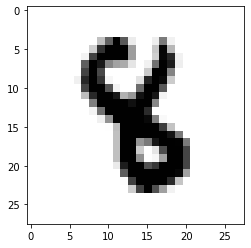

y = 8, predicted=3


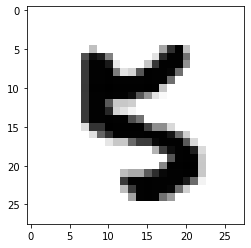

y = 5, predicted=3


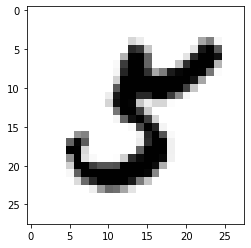

y = 5, predicted=3


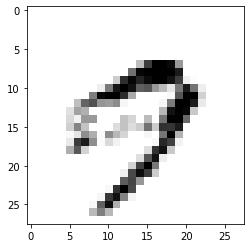

y = 9, predicted=7


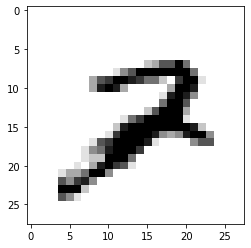

y = 2, predicted=7


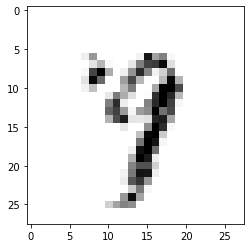

y = 9, predicted=7


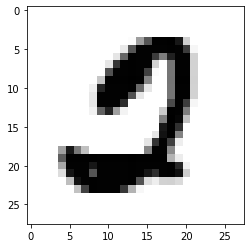

y = 2, predicted=1


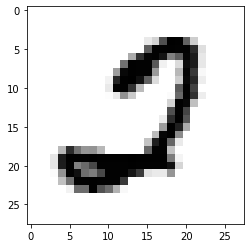

y = 2, predicted=0


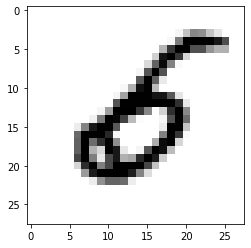

y = 5, predicted=6


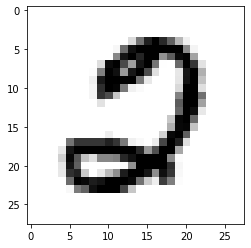

y = 2, predicted=0


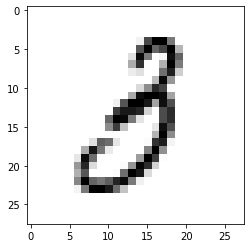

y = 3, predicted=1


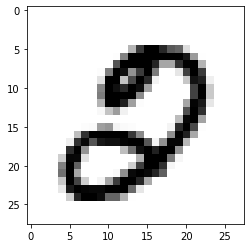

y = 2, predicted=0


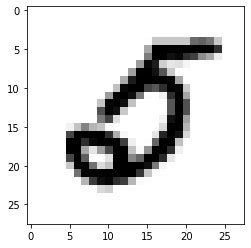

y = 5, predicted=0


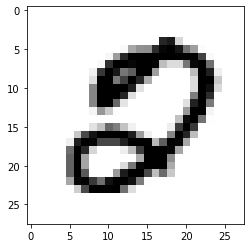

y = 2, predicted=8


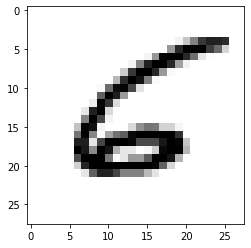

y = 6, predicted=5


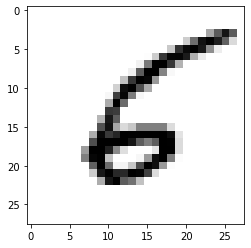

y = 6, predicted=5


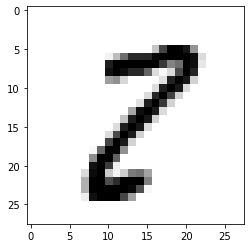

y = 2, predicted=1


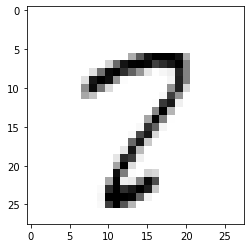

y = 2, predicted=7


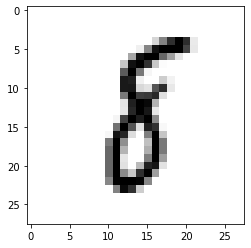

y = 8, predicted=5


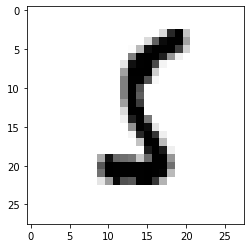

y = 5, predicted=6


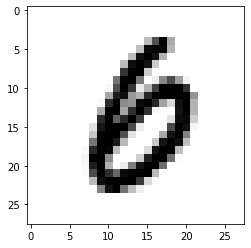

y = 6, predicted=0


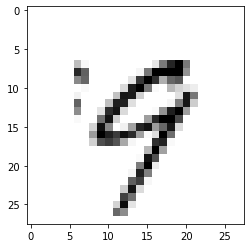

y = 9, predicted=4


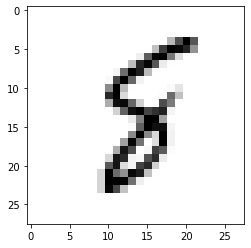

y = 8, predicted=5


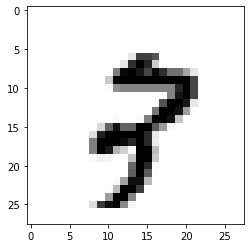

y = 3, predicted=7


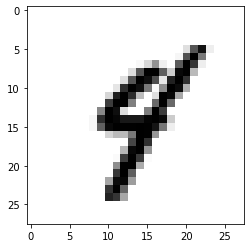

y = 4, predicted=9


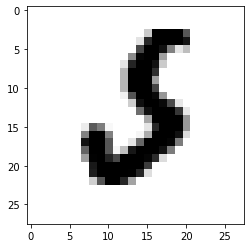

y = 5, predicted=6


In [18]:
for i in range(len(test_y)):
  if test_y[i]==predicted[i]: continue

  plt.imshow(test_x[i].reshape((28,28)), cmap=plt.cm.binary)
  plt.show()
  print("y = {}, predicted={}".format(test_y[i], predicted[i]))



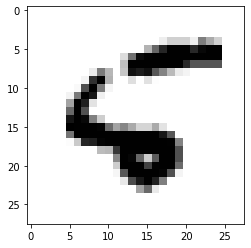

y = 5, predicted=6


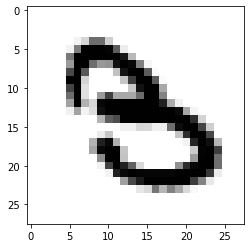

y = 3, predicted=5


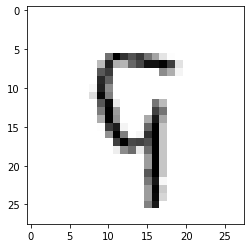

y = 9, predicted=5


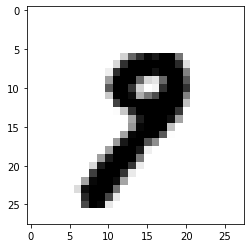

y = 9, predicted=7


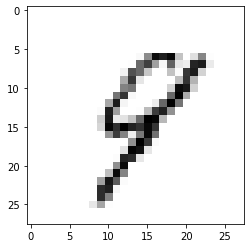

y = 9, predicted=4


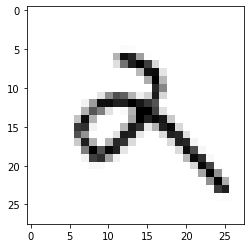

y = 2, predicted=9


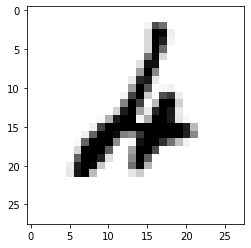

y = 4, predicted=2


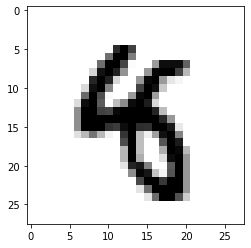

y = 8, predicted=5


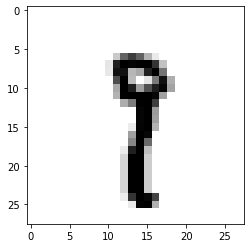

y = 9, predicted=8


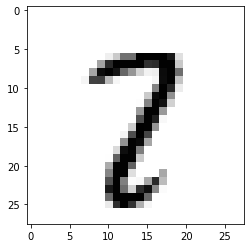

y = 2, predicted=7


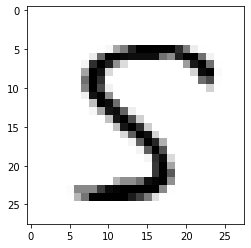

y = 5, predicted=8


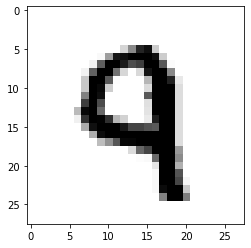

y = 9, predicted=4


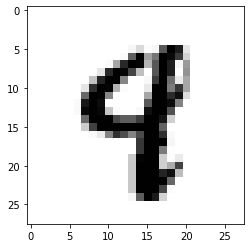

y = 9, predicted=4


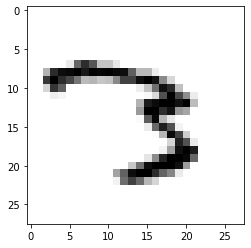

y = 3, predicted=1


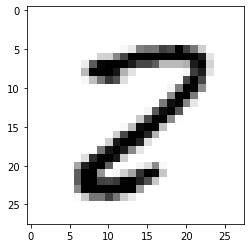

y = 2, predicted=8


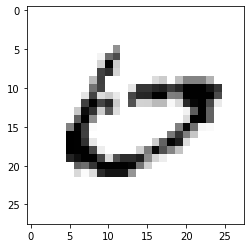

y = 6, predicted=0


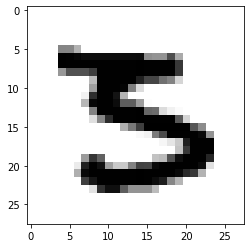

y = 3, predicted=5


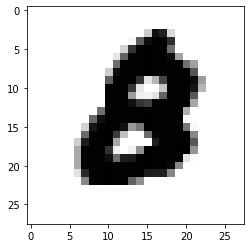

y = 8, predicted=0


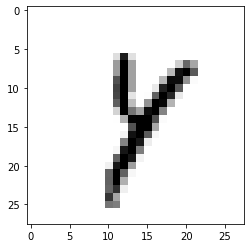

y = 4, predicted=7


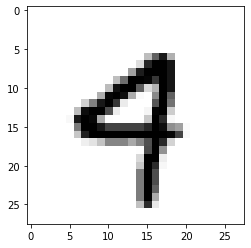

y = 4, predicted=9


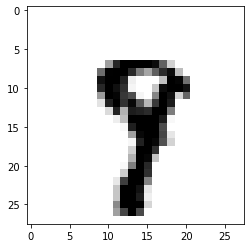

y = 9, predicted=7


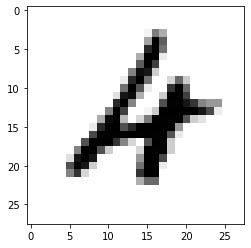

y = 4, predicted=6


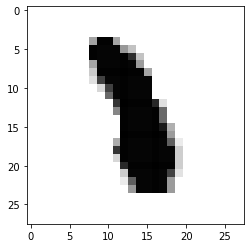

y = 1, predicted=8


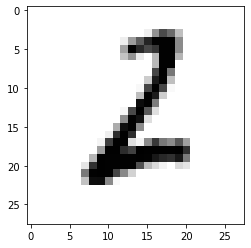

y = 2, predicted=6


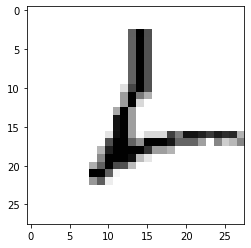

y = 2, predicted=6


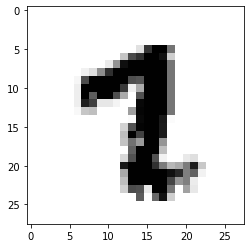

y = 2, predicted=7


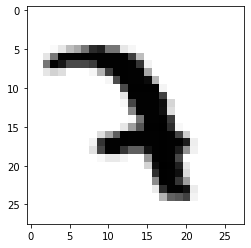

y = 7, predicted=3


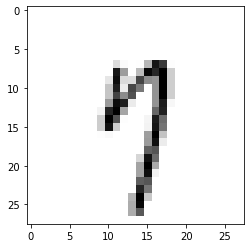

y = 7, predicted=4


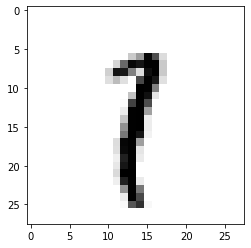

y = 1, predicted=7


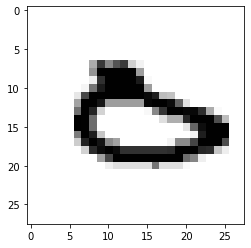

y = 0, predicted=5


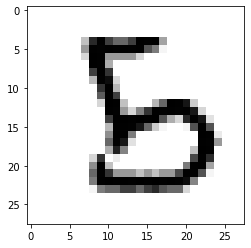

y = 5, predicted=8


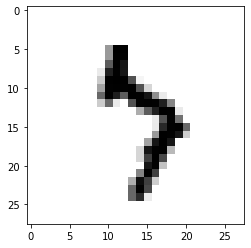

y = 7, predicted=3


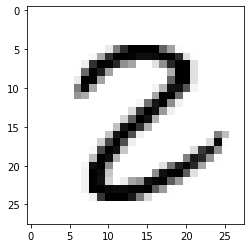

y = 2, predicted=8


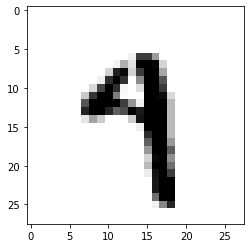

y = 4, predicted=9


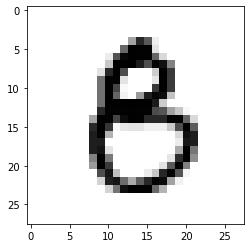

y = 8, predicted=5


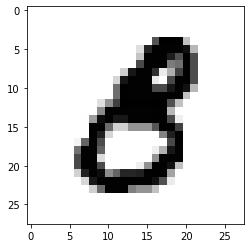

y = 8, predicted=5


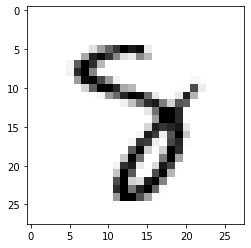

y = 8, predicted=7


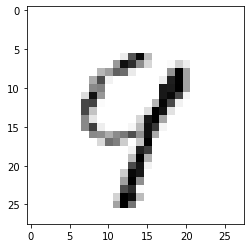

y = 9, predicted=7


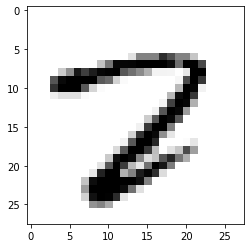

y = 2, predicted=7


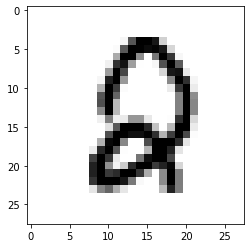

y = 2, predicted=8


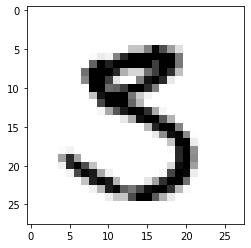

y = 3, predicted=5


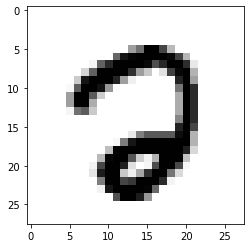

y = 2, predicted=8


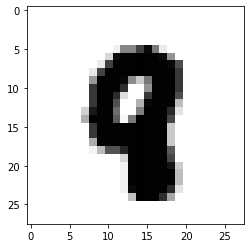

y = 8, predicted=9


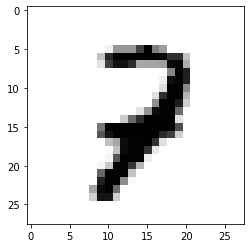

y = 7, predicted=9


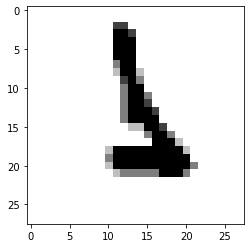

y = 1, predicted=6


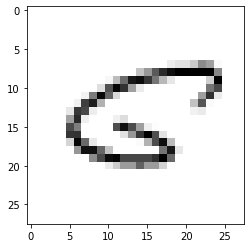

y = 6, predicted=5


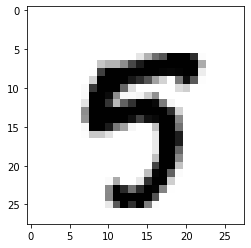

y = 5, predicted=3


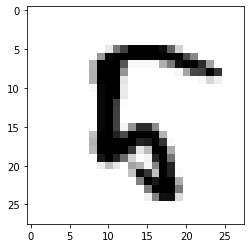

y = 5, predicted=6


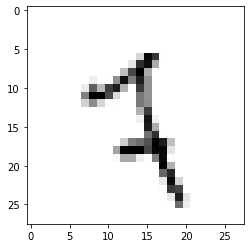

y = 7, predicted=4


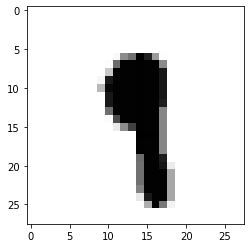

y = 9, predicted=7


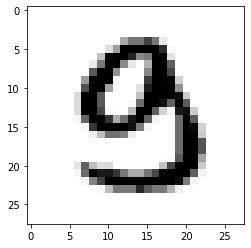

y = 9, predicted=4


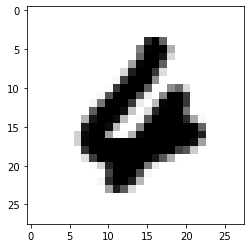

y = 4, predicted=6


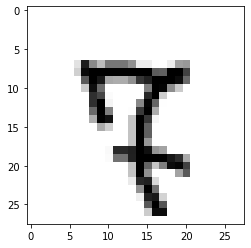

y = 7, predicted=2


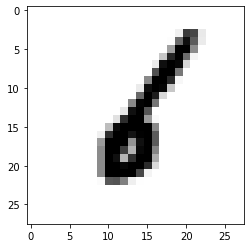

y = 6, predicted=1


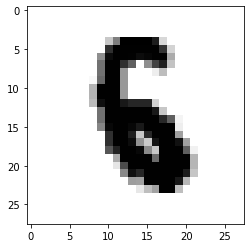

y = 6, predicted=8


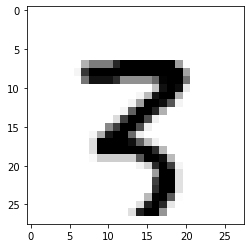

y = 3, predicted=1


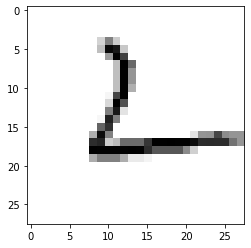

y = 2, predicted=4


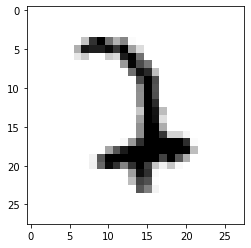

y = 7, predicted=1


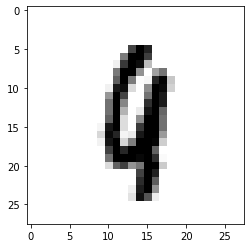

y = 9, predicted=4


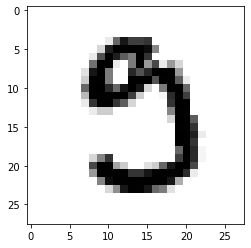

y = 9, predicted=0


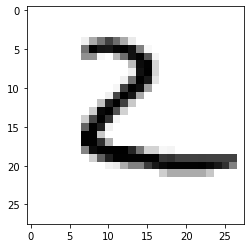

y = 2, predicted=4


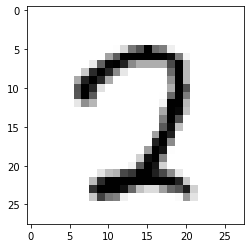

y = 2, predicted=9


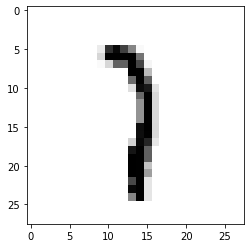

y = 7, predicted=1


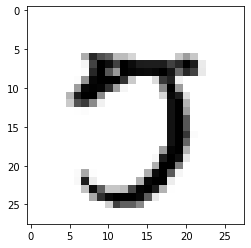

y = 5, predicted=3


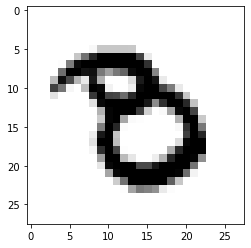

y = 8, predicted=0


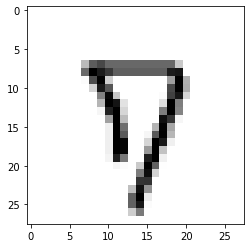

y = 7, predicted=8


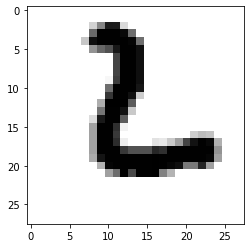

y = 2, predicted=6


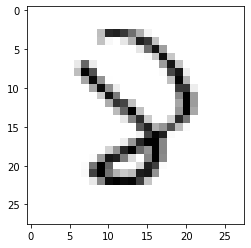

y = 8, predicted=2


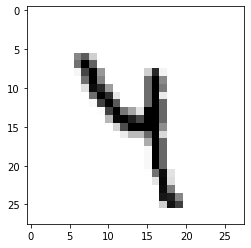

y = 4, predicted=9


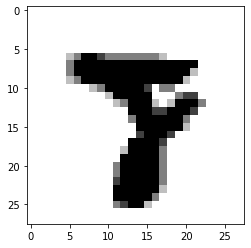

y = 8, predicted=7


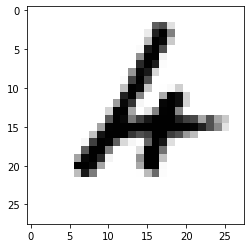

y = 4, predicted=6


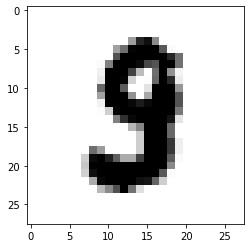

y = 9, predicted=3


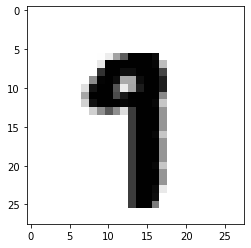

y = 9, predicted=7


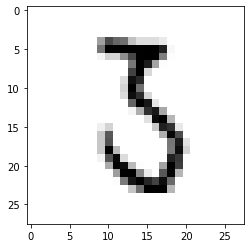

y = 3, predicted=5


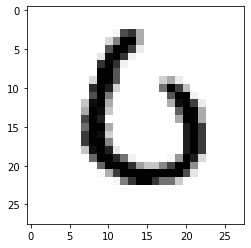

y = 0, predicted=6


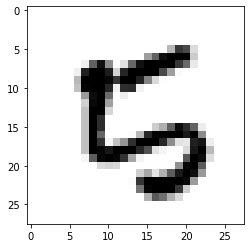

y = 5, predicted=0


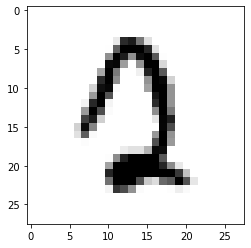

y = 2, predicted=9


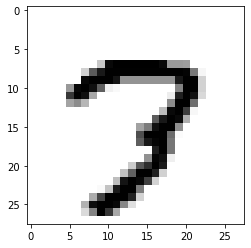

y = 3, predicted=7


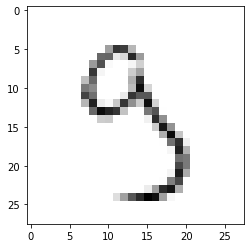

y = 9, predicted=5


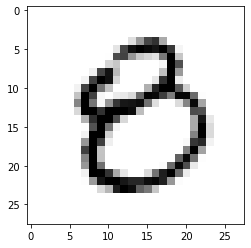

y = 8, predicted=0


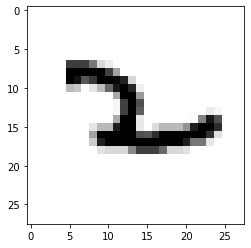

y = 2, predicted=7


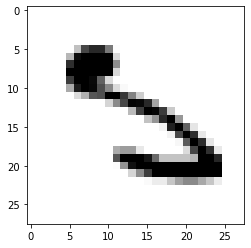

y = 5, predicted=3


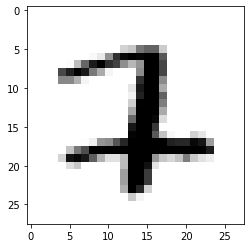

y = 7, predicted=1


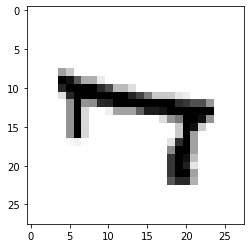

y = 7, predicted=4


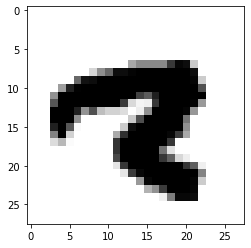

y = 2, predicted=7


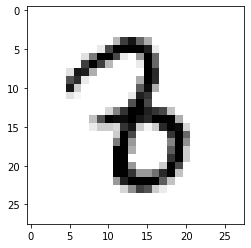

y = 8, predicted=3


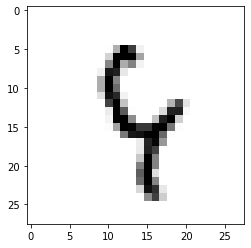

y = 9, predicted=4


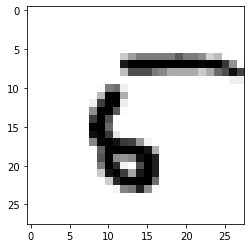

y = 5, predicted=6


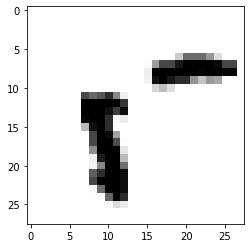

y = 5, predicted=6


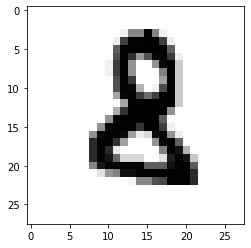

y = 8, predicted=2


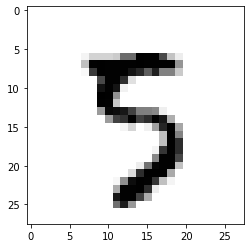

y = 5, predicted=3


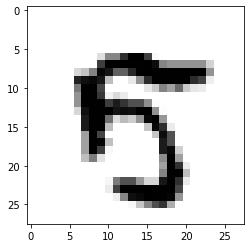

y = 5, predicted=8


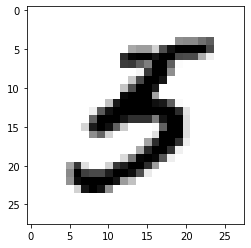

y = 5, predicted=3


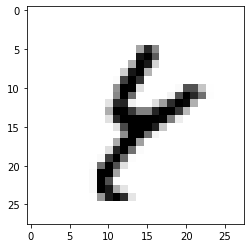

y = 4, predicted=8


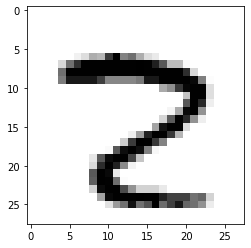

y = 2, predicted=7


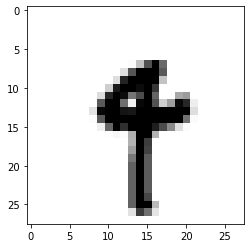

y = 4, predicted=9


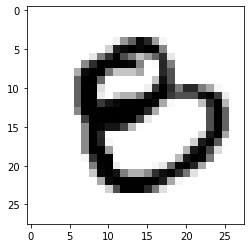

y = 8, predicted=0


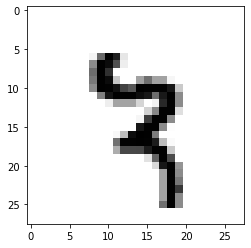

y = 3, predicted=9


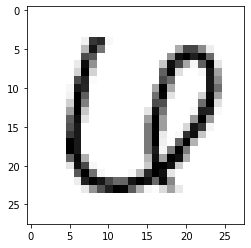

y = 6, predicted=0


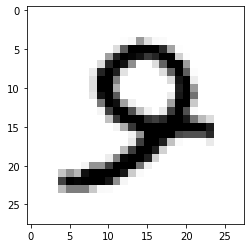

y = 9, predicted=0


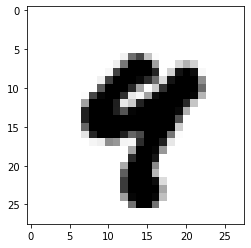

y = 4, predicted=9


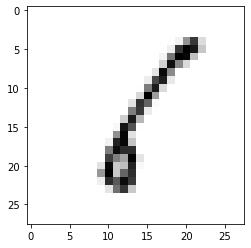

y = 6, predicted=1


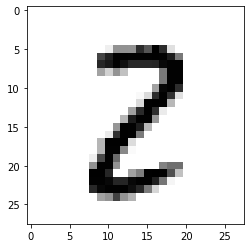

y = 2, predicted=8


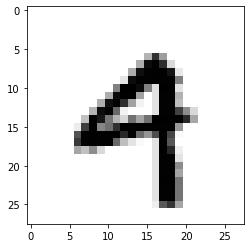

y = 4, predicted=9


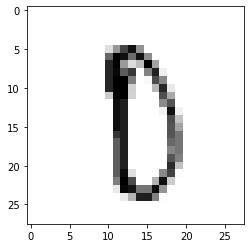

y = 0, predicted=8


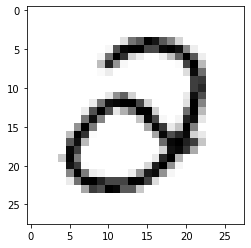

y = 2, predicted=0


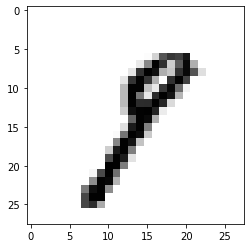

y = 9, predicted=7


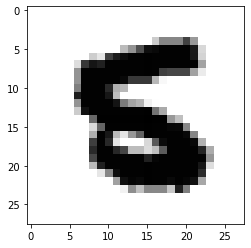

y = 5, predicted=8


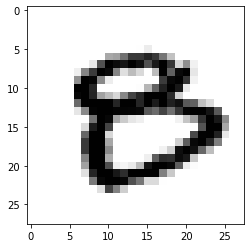

y = 8, predicted=0


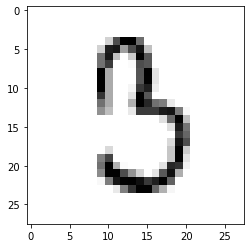

y = 3, predicted=5


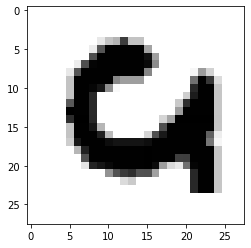

y = 9, predicted=2


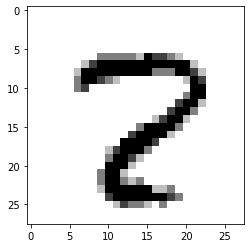

y = 2, predicted=8


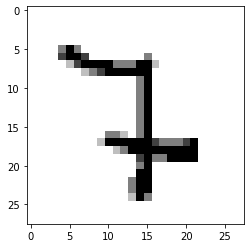

y = 7, predicted=1


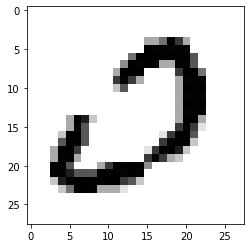

y = 0, predicted=7


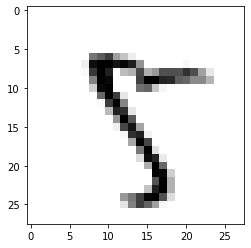

y = 5, predicted=8


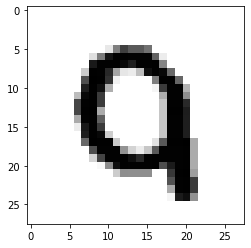

y = 9, predicted=4


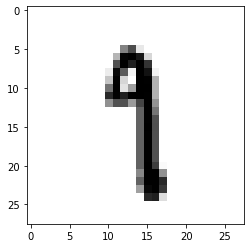

y = 9, predicted=7


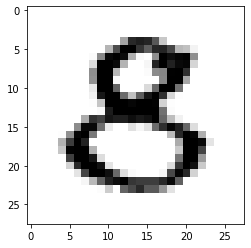

y = 8, predicted=5


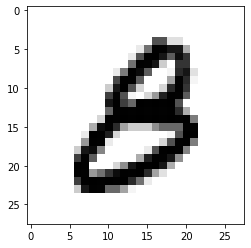

y = 8, predicted=6


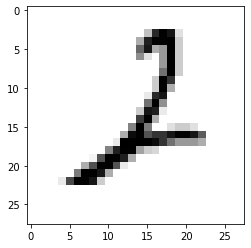

y = 2, predicted=1


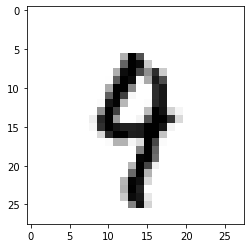

y = 4, predicted=9


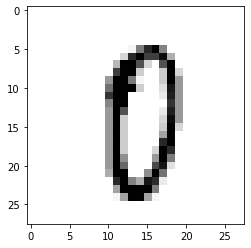

y = 0, predicted=7


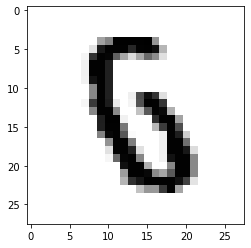

y = 6, predicted=8


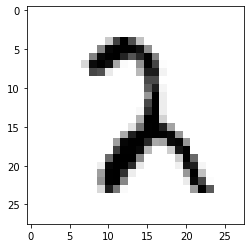

y = 2, predicted=7


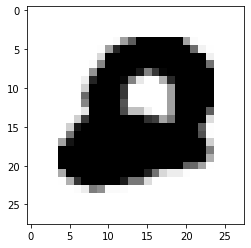

y = 2, predicted=8


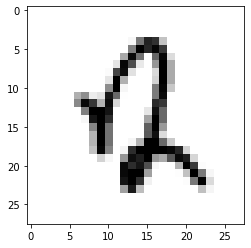

y = 2, predicted=9


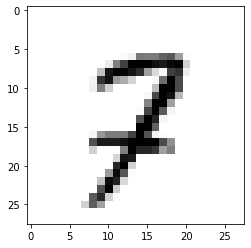

y = 7, predicted=3


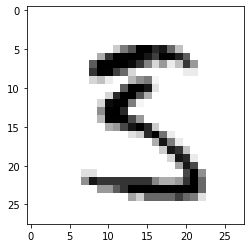

y = 5, predicted=3


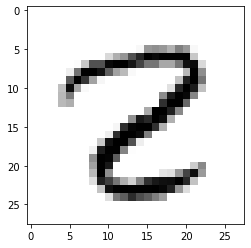

y = 2, predicted=8


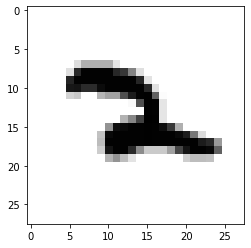

y = 2, predicted=7


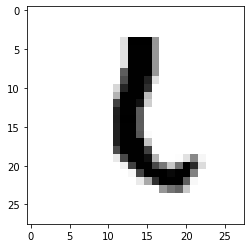

y = 6, predicted=1


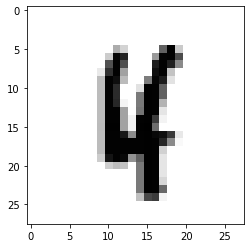

y = 4, predicted=1


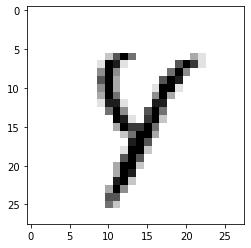

y = 4, predicted=9


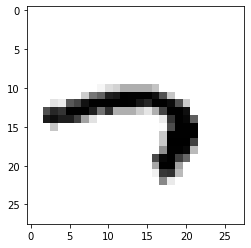

y = 7, predicted=1


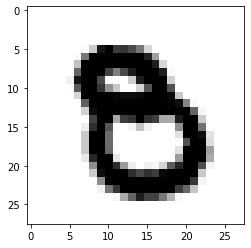

y = 8, predicted=0


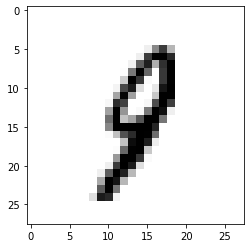

y = 9, predicted=4


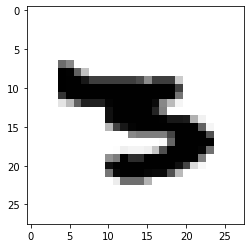

y = 3, predicted=7


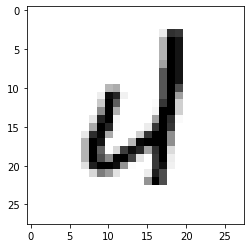

y = 4, predicted=0


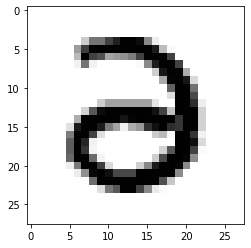

y = 2, predicted=4


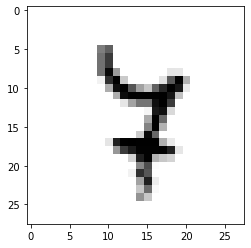

y = 7, predicted=4


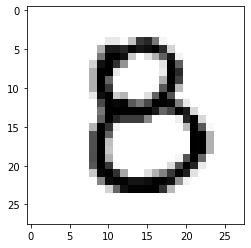

y = 8, predicted=0


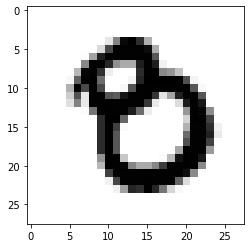

y = 8, predicted=0


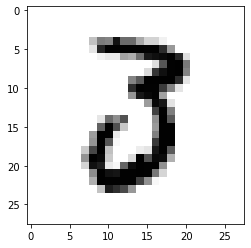

y = 3, predicted=0


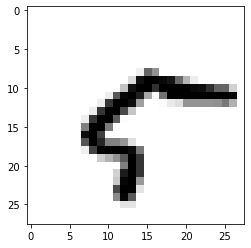

y = 5, predicted=7


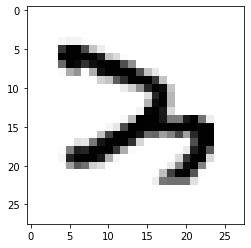

y = 3, predicted=2


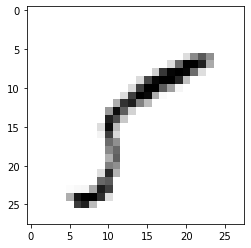

y = 5, predicted=1


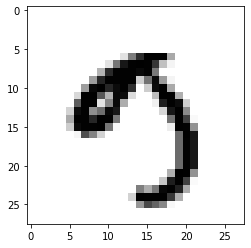

y = 9, predicted=0


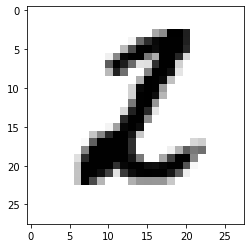

y = 2, predicted=6


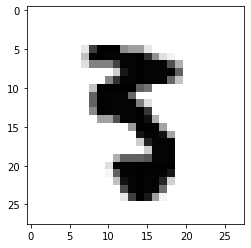

y = 3, predicted=5


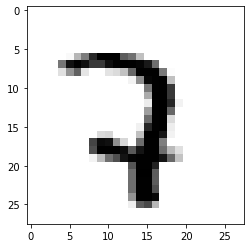

y = 7, predicted=3


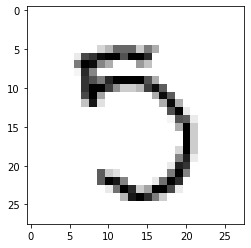

y = 5, predicted=3


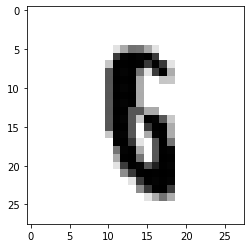

y = 6, predicted=8


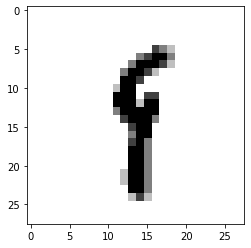

y = 9, predicted=8


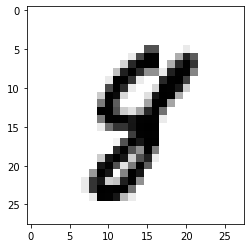

y = 8, predicted=9


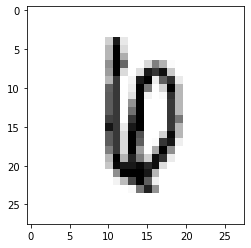

y = 6, predicted=8


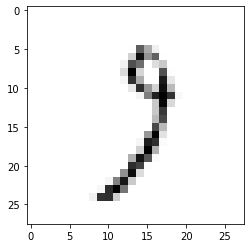

y = 9, predicted=7


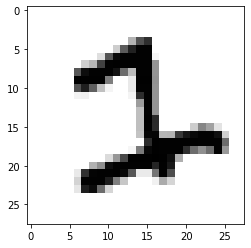

y = 1, predicted=2


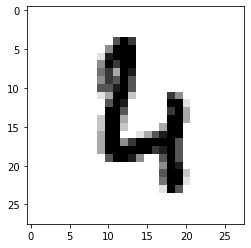

y = 4, predicted=6


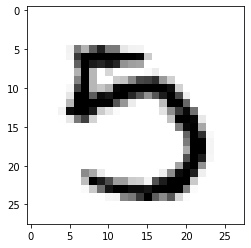

y = 5, predicted=3


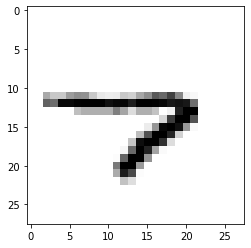

y = 7, predicted=1


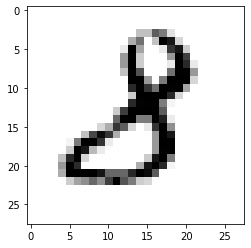

y = 8, predicted=5


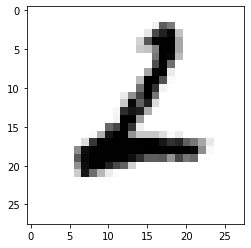

y = 2, predicted=6


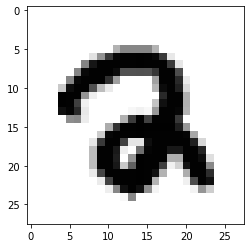

y = 2, predicted=8


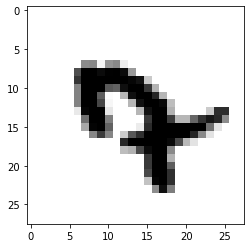

y = 7, predicted=9


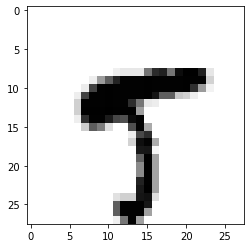

y = 5, predicted=8


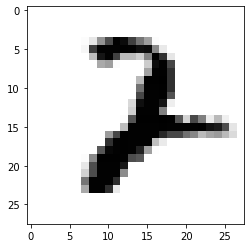

y = 2, predicted=7


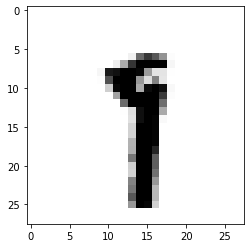

y = 9, predicted=7


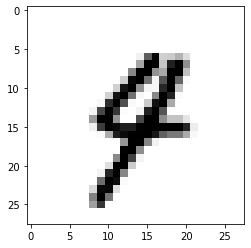

y = 4, predicted=9


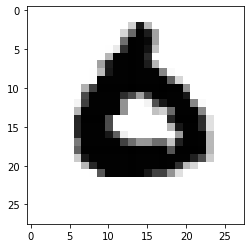

y = 6, predicted=0


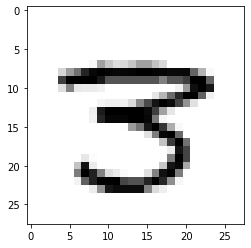

y = 3, predicted=1


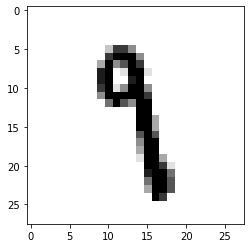

y = 9, predicted=7


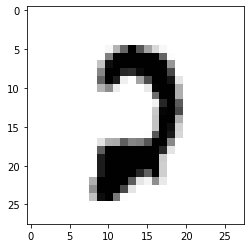

y = 2, predicted=7


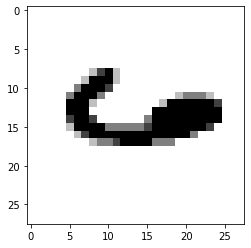

y = 6, predicted=4


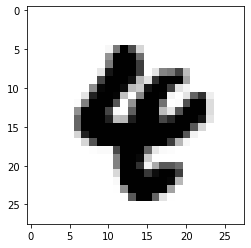

y = 4, predicted=0


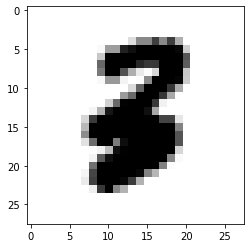

y = 3, predicted=2


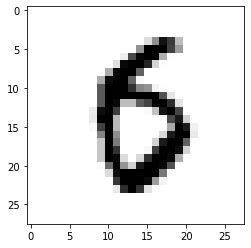

y = 6, predicted=8


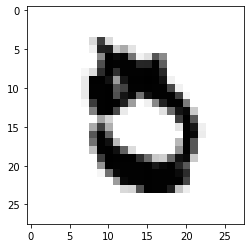

y = 5, predicted=0


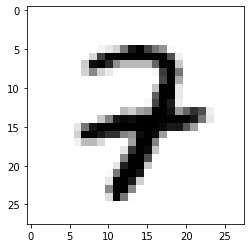

y = 7, predicted=2


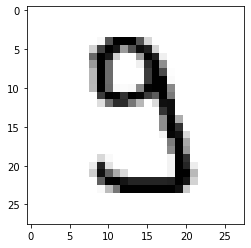

y = 9, predicted=3


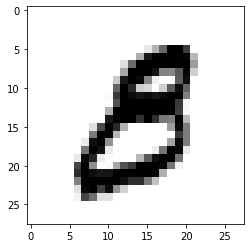

y = 8, predicted=5


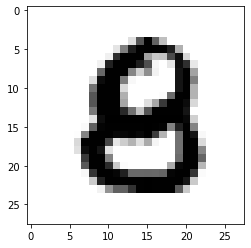

y = 8, predicted=5


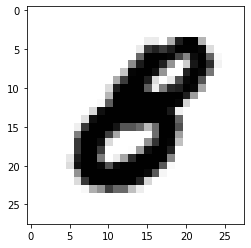

y = 8, predicted=0


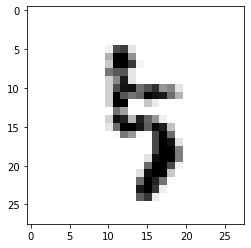

y = 5, predicted=3


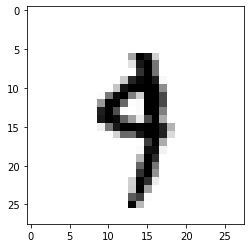

y = 4, predicted=9


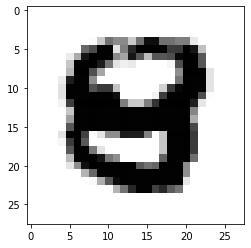

y = 8, predicted=0


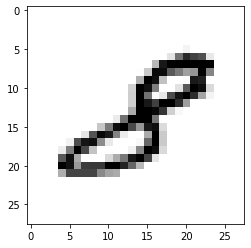

y = 8, predicted=5


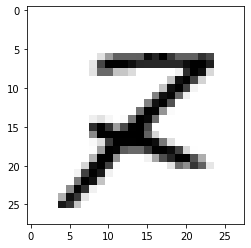

y = 7, predicted=2


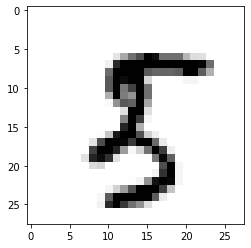

y = 5, predicted=8


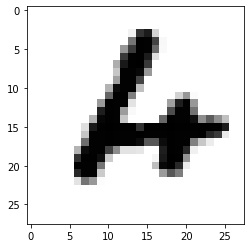

y = 4, predicted=6


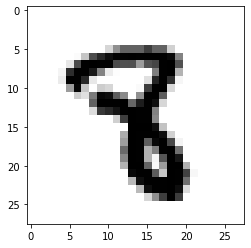

y = 8, predicted=1


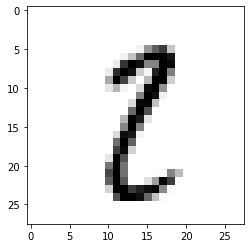

y = 2, predicted=8


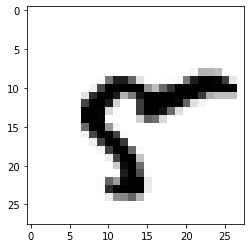

y = 5, predicted=8


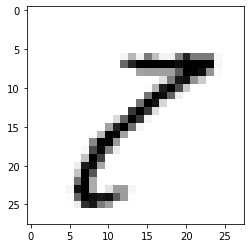

y = 7, predicted=8


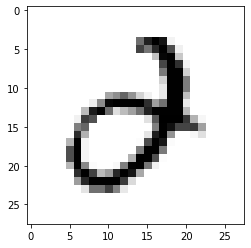

y = 2, predicted=0


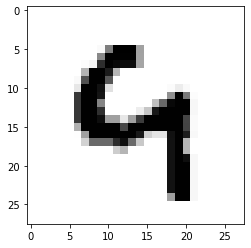

y = 9, predicted=4


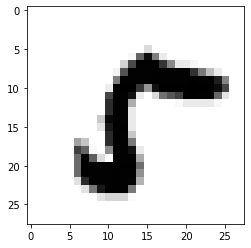

y = 5, predicted=0


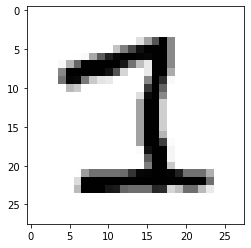

y = 1, predicted=3


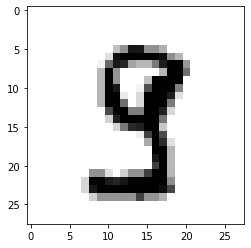

y = 9, predicted=3


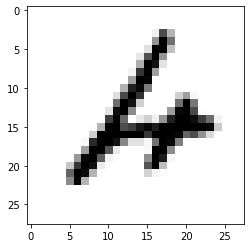

y = 4, predicted=6


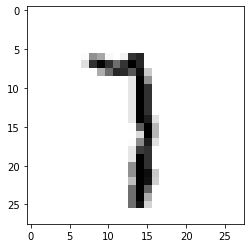

y = 7, predicted=1


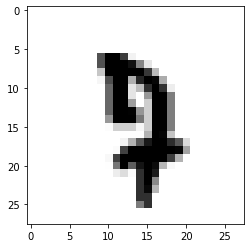

y = 7, predicted=9


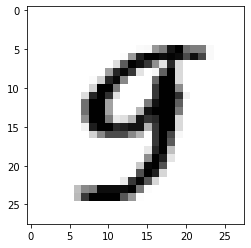

y = 9, predicted=4


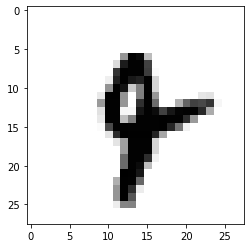

y = 4, predicted=9


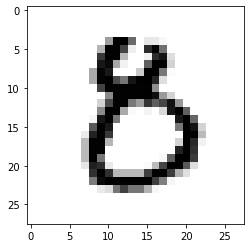

y = 8, predicted=6


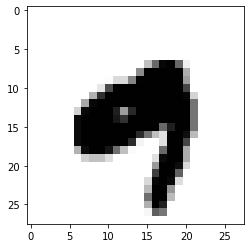

y = 9, predicted=4


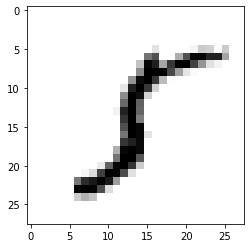

y = 5, predicted=1


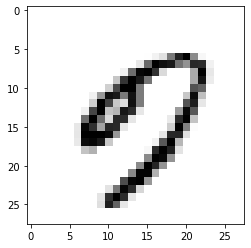

y = 9, predicted=0


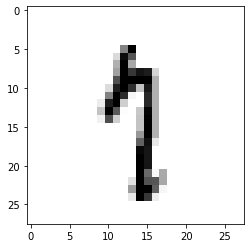

y = 1, predicted=4


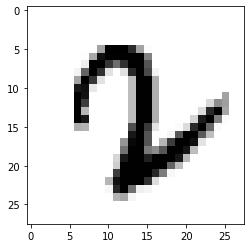

y = 2, predicted=1


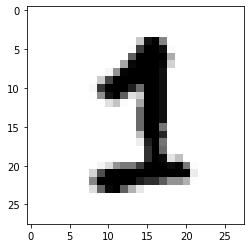

y = 1, predicted=3


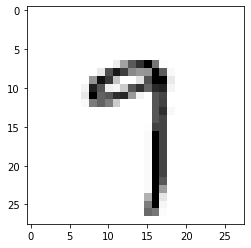

y = 9, predicted=7


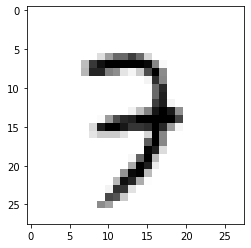

y = 7, predicted=3


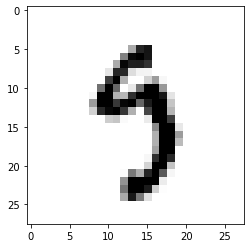

y = 9, predicted=3


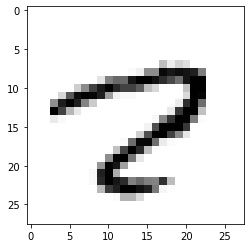

y = 2, predicted=7


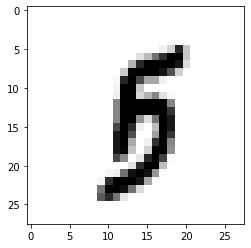

y = 5, predicted=6


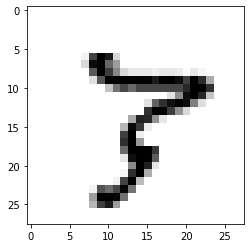

y = 3, predicted=1


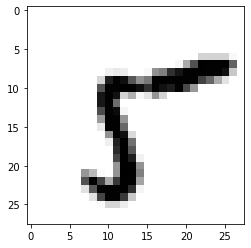

y = 5, predicted=8


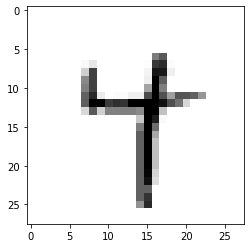

y = 4, predicted=7


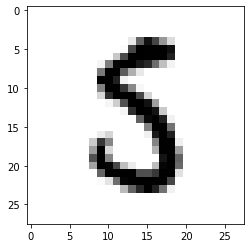

y = 5, predicted=8


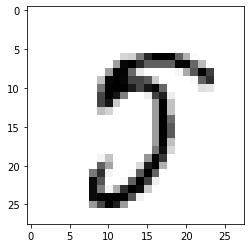

y = 5, predicted=7


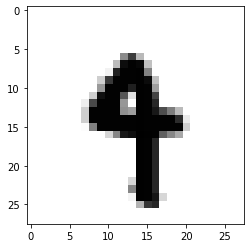

y = 4, predicted=9


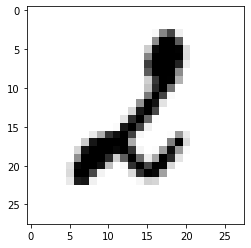

y = 2, predicted=6


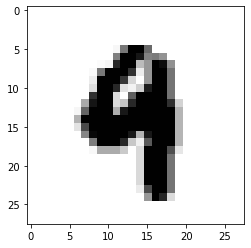

y = 9, predicted=4


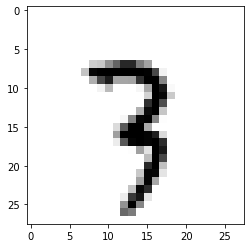

y = 3, predicted=7


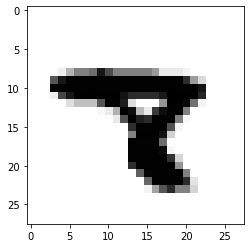

y = 8, predicted=7


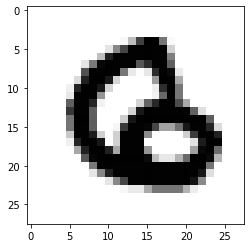

y = 6, predicted=0


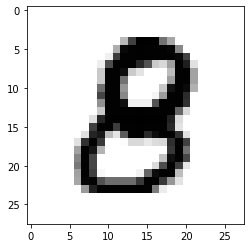

y = 8, predicted=5


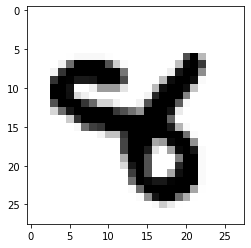

y = 8, predicted=7


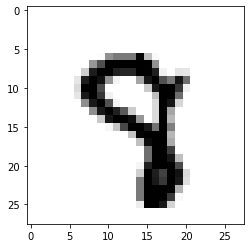

y = 8, predicted=9


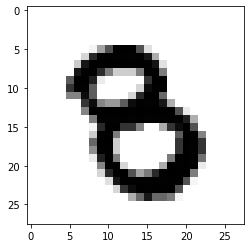

y = 8, predicted=5


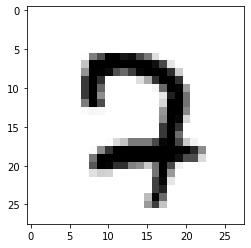

y = 7, predicted=2


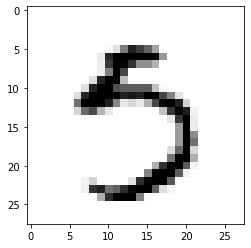

y = 5, predicted=3


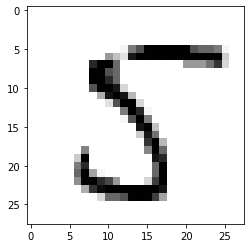

y = 5, predicted=8


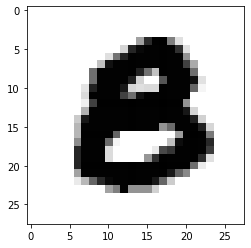

y = 8, predicted=0


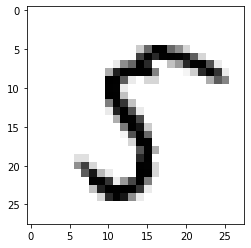

y = 5, predicted=8


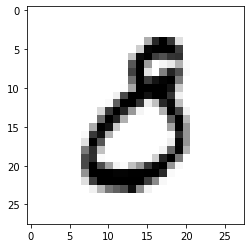

y = 8, predicted=0


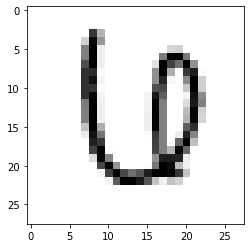

y = 6, predicted=0


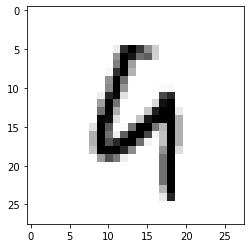

y = 9, predicted=4


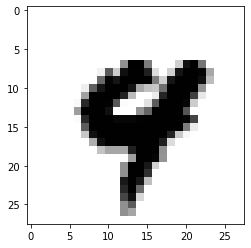

y = 4, predicted=9


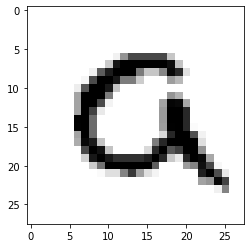

y = 9, predicted=5


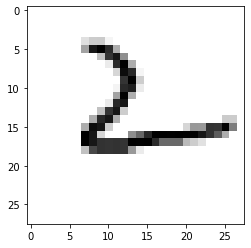

y = 2, predicted=4


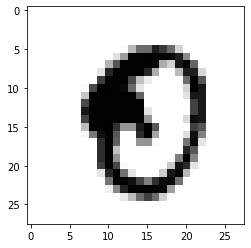

y = 0, predicted=8


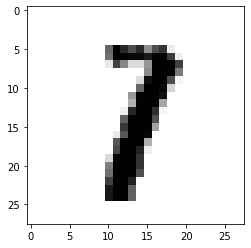

y = 7, predicted=1


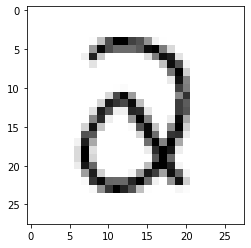

y = 2, predicted=4


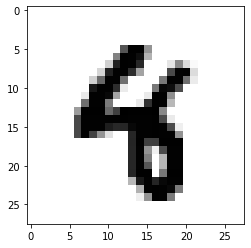

y = 8, predicted=9


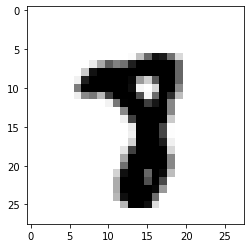

y = 8, predicted=7


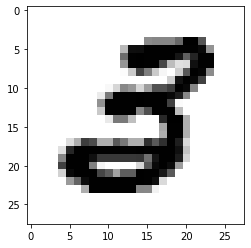

y = 3, predicted=5


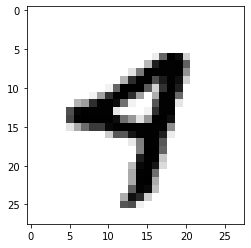

y = 4, predicted=9


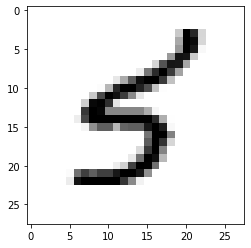

y = 5, predicted=3


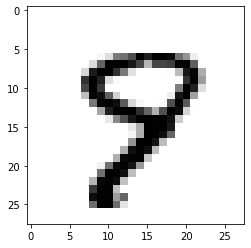

y = 9, predicted=8


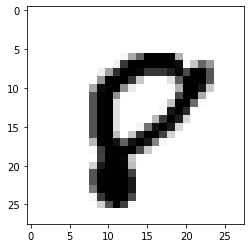

y = 8, predicted=0


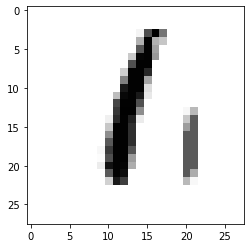

y = 1, predicted=6


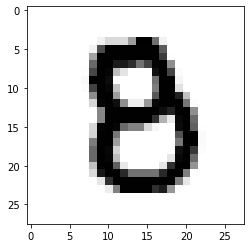

y = 8, predicted=0


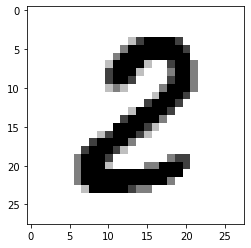

y = 2, predicted=8


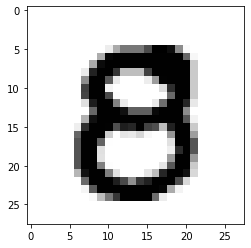

y = 8, predicted=0


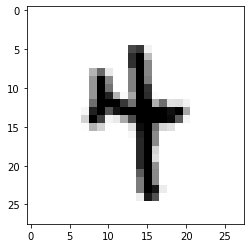

y = 4, predicted=1


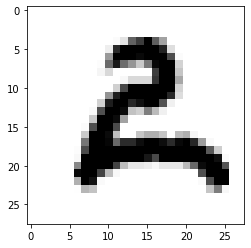

y = 2, predicted=4


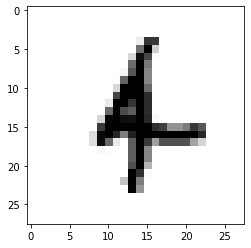

y = 4, predicted=1


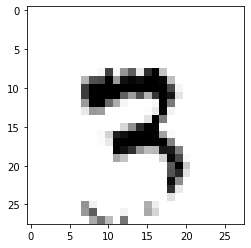

y = 3, predicted=7


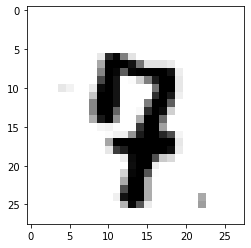

y = 7, predicted=9


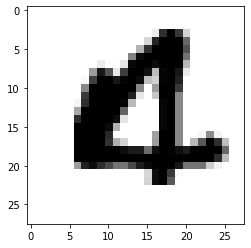

y = 4, predicted=0


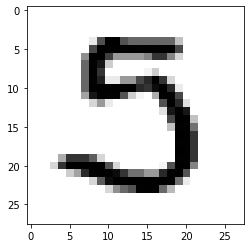

y = 5, predicted=3


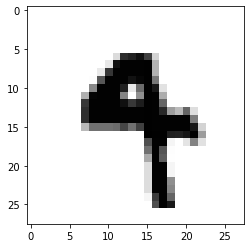

y = 4, predicted=9


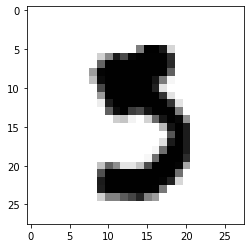

y = 5, predicted=3


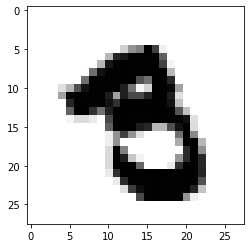

y = 3, predicted=8


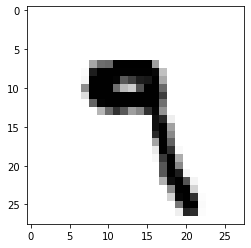

y = 9, predicted=7


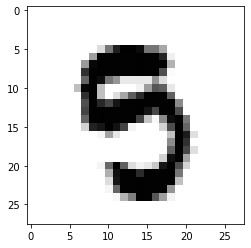

y = 5, predicted=3


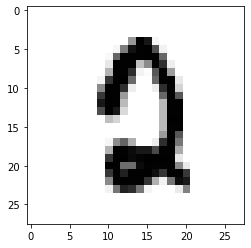

y = 2, predicted=0


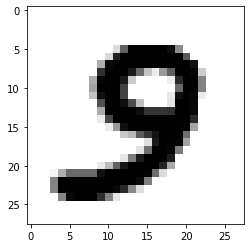

y = 9, predicted=4


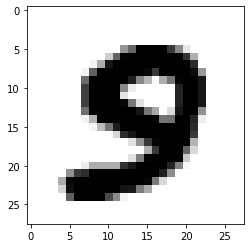

y = 9, predicted=5


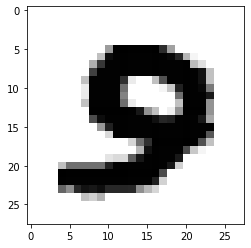

y = 9, predicted=5


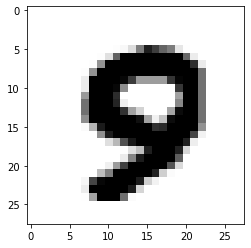

y = 9, predicted=5


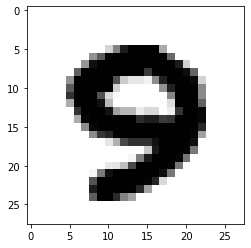

y = 9, predicted=4


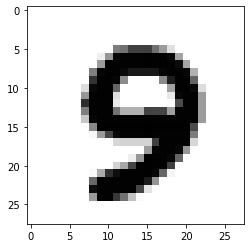

y = 9, predicted=4


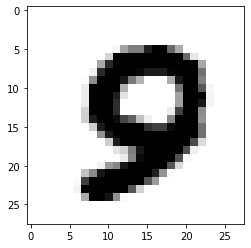

y = 9, predicted=5


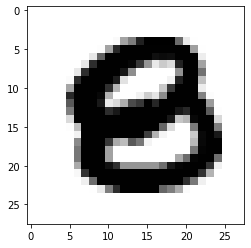

y = 8, predicted=0


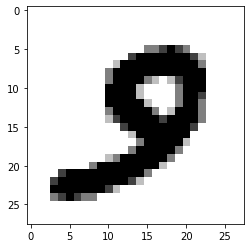

y = 9, predicted=5


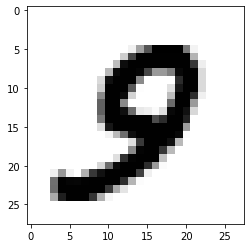

y = 9, predicted=4


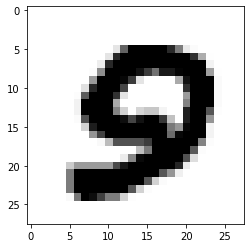

y = 9, predicted=0


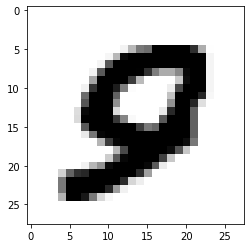

y = 9, predicted=0


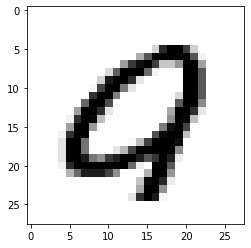

y = 9, predicted=0


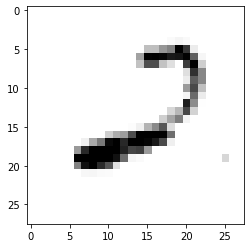

y = 2, predicted=8


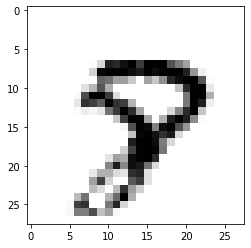

y = 8, predicted=7


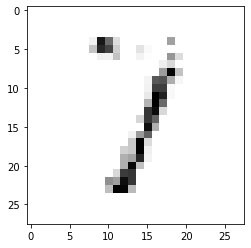

y = 7, predicted=1


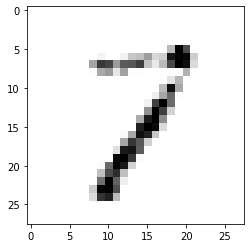

y = 7, predicted=1


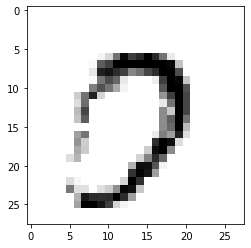

y = 0, predicted=7


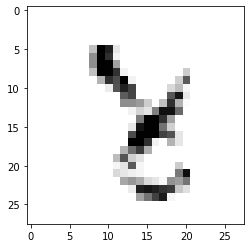

y = 8, predicted=2


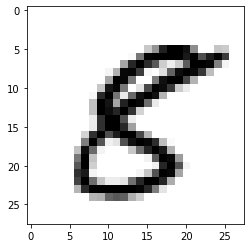

y = 8, predicted=5


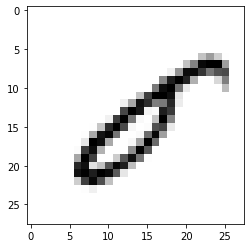

y = 0, predicted=8


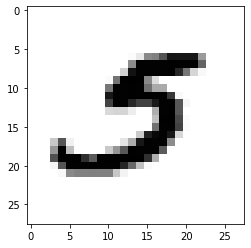

y = 5, predicted=3


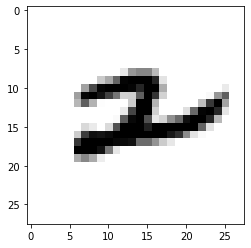

y = 2, predicted=7


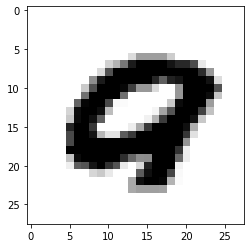

y = 9, predicted=0


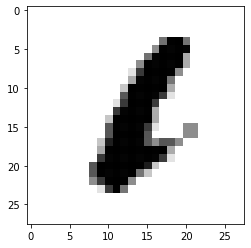

y = 1, predicted=6


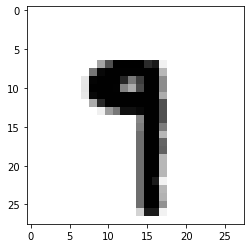

y = 9, predicted=7


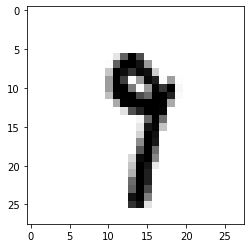

y = 9, predicted=7


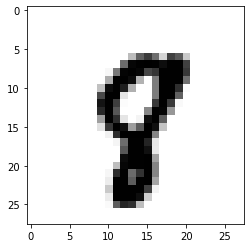

y = 8, predicted=9


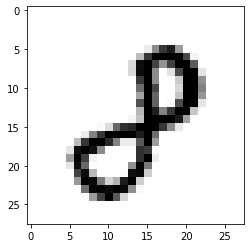

y = 8, predicted=2


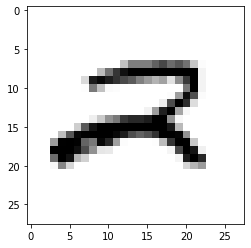

y = 2, predicted=7


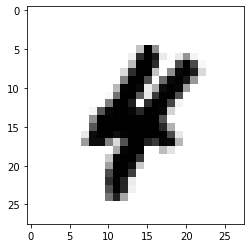

y = 4, predicted=7


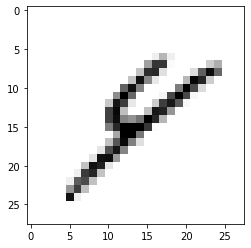

y = 4, predicted=9


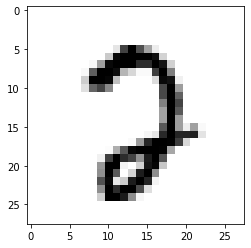

y = 2, predicted=7


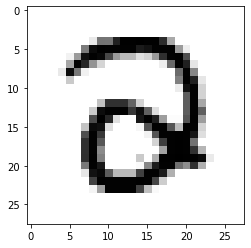

y = 2, predicted=4


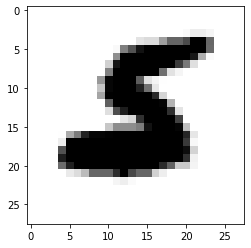

y = 5, predicted=8


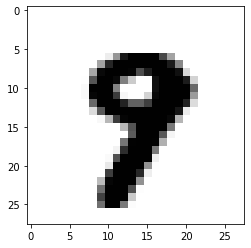

y = 9, predicted=8


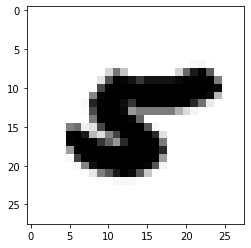

y = 5, predicted=8


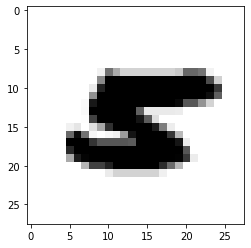

y = 5, predicted=8


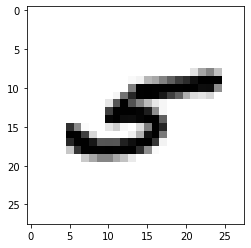

y = 5, predicted=3


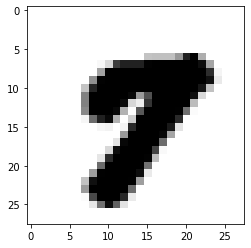

y = 7, predicted=8


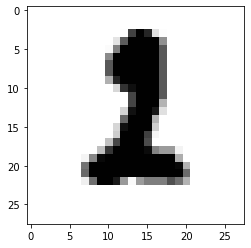

y = 2, predicted=1


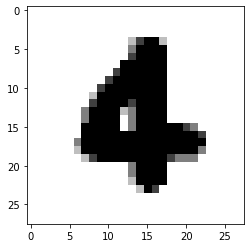

y = 4, predicted=6


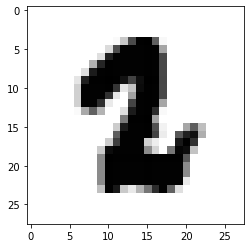

y = 2, predicted=1


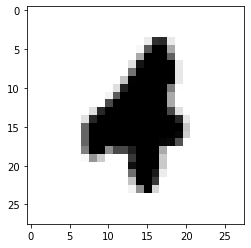

y = 4, predicted=1


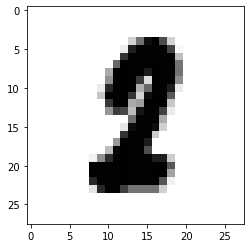

y = 2, predicted=8


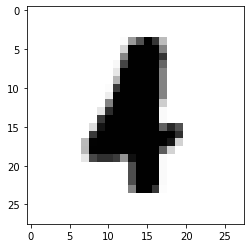

y = 4, predicted=6


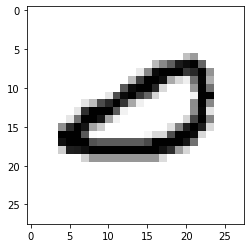

y = 0, predicted=9


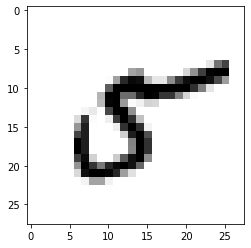

y = 5, predicted=8


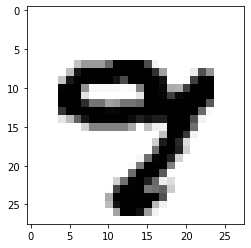

y = 9, predicted=7


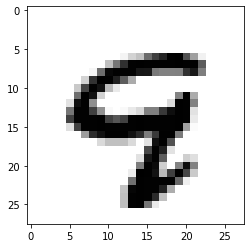

y = 9, predicted=4


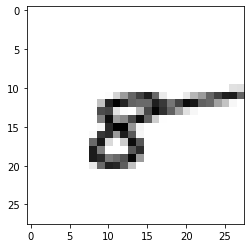

y = 8, predicted=6


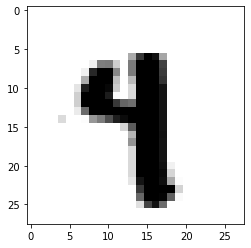

y = 4, predicted=9


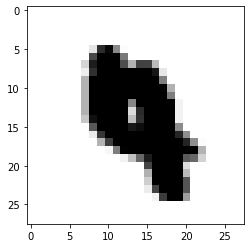

y = 4, predicted=9


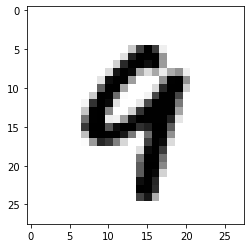

y = 9, predicted=4


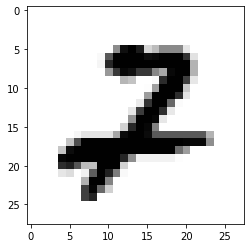

y = 7, predicted=2


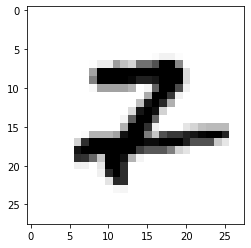

y = 7, predicted=2


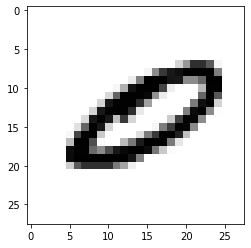

y = 0, predicted=5


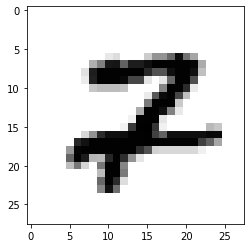

y = 7, predicted=2


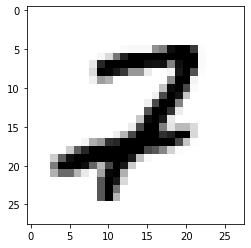

y = 7, predicted=2


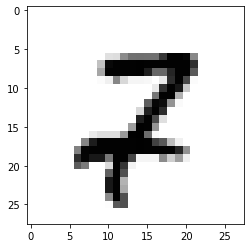

y = 7, predicted=2


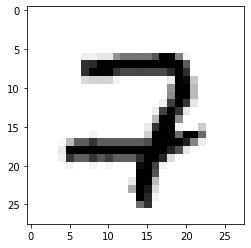

y = 7, predicted=9


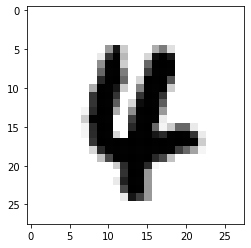

y = 4, predicted=1


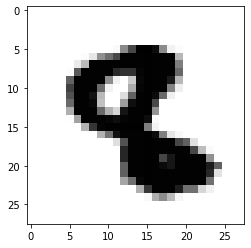

y = 8, predicted=9


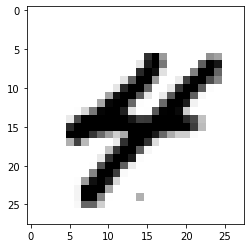

y = 4, predicted=7


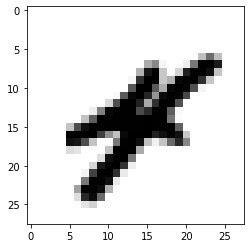

y = 4, predicted=7


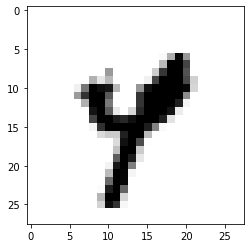

y = 4, predicted=7


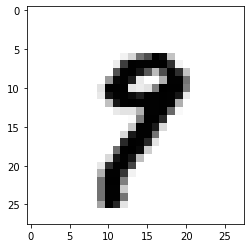

y = 9, predicted=7


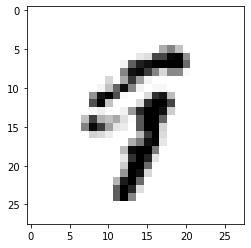

y = 9, predicted=3


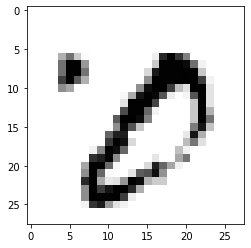

y = 0, predicted=7


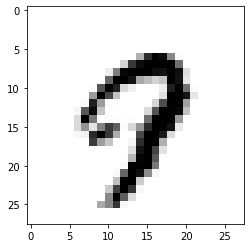

y = 9, predicted=7


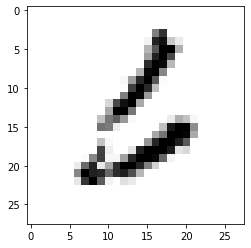

y = 6, predicted=1


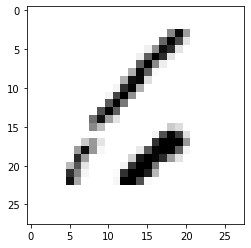

y = 6, predicted=5


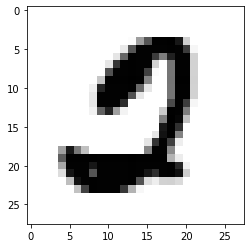

y = 2, predicted=4


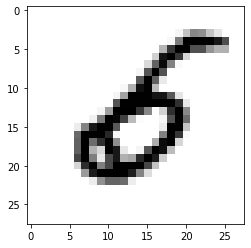

y = 5, predicted=6


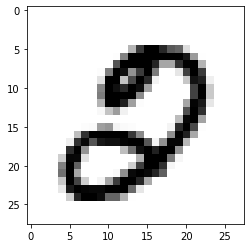

y = 2, predicted=0


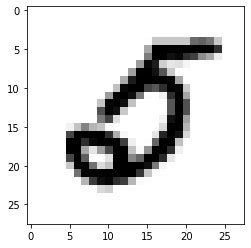

y = 5, predicted=0


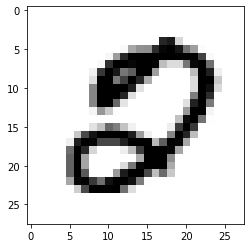

y = 2, predicted=9


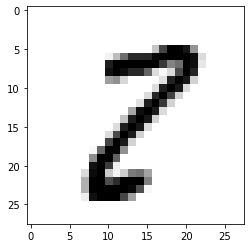

y = 2, predicted=8


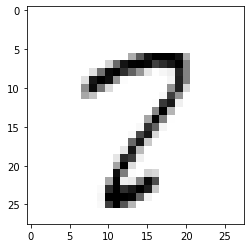

y = 2, predicted=7


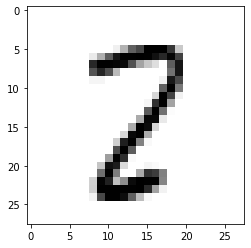

y = 2, predicted=8


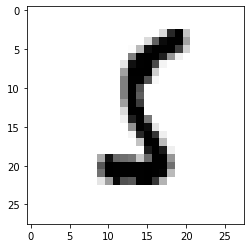

y = 5, predicted=1


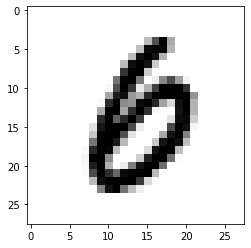

y = 6, predicted=0


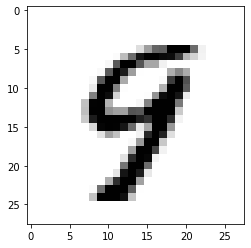

y = 9, predicted=4


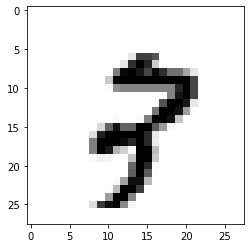

y = 3, predicted=9


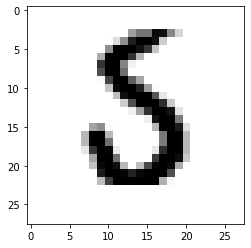

y = 5, predicted=6


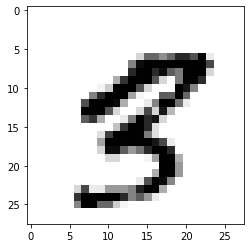

y = 3, predicted=5


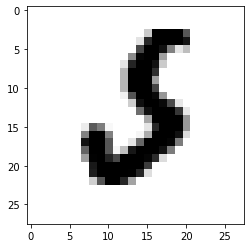

y = 5, predicted=6


In [22]:
for i in range(len(test_y)):
  if test_y[i]==predicted[i]: continue

  plt.imshow(test_x[i].reshape((28,28)), cmap=plt.cm.binary)
  plt.show()
  print("y = {}, predicted={}".format(test_y[i], predicted[i]))



# DropOut, BatchNormalization 순서 바꿈

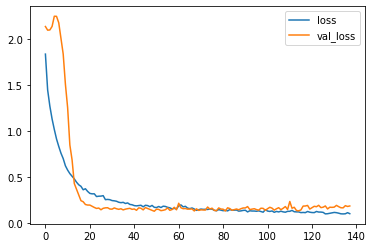

loss =  0.10420311242341995 , val_loss =  0.1878800392150879
Epoch 139/1000
20/38 [==============>...............] - ETA: 0s - loss: 0.1071 - accuracy: 0.9578

KeyboardInterrupt: ignored

In [24]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization()) # MODIFIED
model.add(Dropout(0.2)) # MODIFIED
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization()) # MODIFIED
model.add(Dropout(0.2)) # MODIFIED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization()) # MODIFIED
model.add(Dropout(0.2)) # MODIFIED
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization()) # MODIFIED
model.add(Dropout(0.2)) # MODIFIED
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=10)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=1000, verbose=1, batch_size=128, validation_split=0.2, 
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


In [25]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1440 - accuracy: 0.9669
loss= 0.14402619004249573
acc= 0.9668999910354614


# Conv 레이어들 추가

In [28]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))

model.add(Conv2D(32, (3, 3)))
model.add(Conv2D(32, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Conv2D(64, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(10, activation='relu'))
model.add(BatchNormalization()) # MODIFIED
model.add(Dropout(0.2)) # MODIFIED
model.add(Dense(10, activation='relu'))

model.add(BatchNormalization()) # MODIFIED
model.add(Dropout(0.2)) # MODIFIED
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=10)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=1000, verbose=1, batch_size=128, validation_split=0.2, 
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


KeyboardInterrupt: ignored

In [29]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.1216 - accuracy: 0.9715
loss= 0.12157022953033447
acc= 0.9714999794960022


# dropout 확률 변경

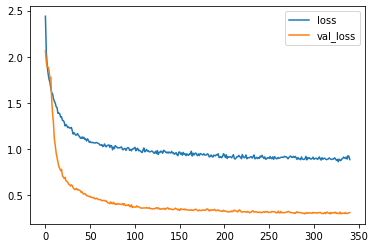

loss =  0.8853404521942139 , val_loss =  0.311638742685318
313/313 [==============================] - 1s 3ms/step - loss: 0.2922 - accuracy: 0.9331
loss= 0.2921949625015259
acc= 0.9330999851226807
[7 2 1 ... 4 5 6]


In [31]:
from tensorflow.keras.layers import Dropout

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))

model.add(Conv2D(32, (3, 3)))
model.add(Conv2D(32, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Conv2D(64, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) # MODIFIED
model.add(Dense(10, activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.5)) # MODIFIED
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


plot_losses = PlotLosses()
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=50)


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit(train_x[:6000], train_y[:6000], epochs=1000, verbose=1, batch_size=128, validation_split=0.2, 
          callbacks=[plot_losses, early_stopping])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)
